**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 2](#toc1_)    
  - [Before Starting](#toc1_1_)    
  - [Introduction](#toc1_2_)    
  - [**1. Data Preparation**](#toc1_3_)    
  - [**1.1 Load data**](#toc1_4_)    
    - [**1.2 Save data**](#toc1_4_1_)    
  - [**2. Large Language Models (LLMs)**](#toc1_5_)    
    - [Open-Source vs. Proprietary LLMs](#toc1_5_1_)    
    - [Why Use Code (API) for Data Mining?](#toc1_5_2_)    
    - [The Gemini API](#toc1_5_3_)    
    - [Interacting with the Gemini API](#toc1_5_4_)    
    - [**2.1 Text Prompting**](#toc1_5_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_5_1_1_)    
    - [**2.2 Structured Output**](#toc1_5_6_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_5_6_1_1_)    
    - [**2.3 Information Extraction and Grounding:**](#toc1_5_7_)    
      - [**`langextract`: A Library for Grounded Extraction**](#toc1_5_7_1_)    
        - [**2.3.1 Using PDF Documents:**](#toc1_5_7_1_1_)    
        - [**>>> Bonus Exercise 3 (Take home):**](#toc1_5_7_1_2_)    
    - [**2.4 Generating LLM Embeddings:**](#toc1_5_8_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_5_8_1_1_)    
    - [**2.5 Retrieval-Augmented Generation (RAG)**](#toc1_5_9_)    
        - [**Actual answer in the URL:**](#toc1_5_9_1_1_)    
        - [**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc1_5_9_1_2_)    
        - [**>>> Bonus Exercise 5 (Take home):**](#toc1_5_9_1_3_)    
    - [**2.6 Few-Shot Prompting Classification:**](#toc1_5_10_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_5_10_1_1_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_5_10_1_2_)    
    - [**2.7 Extra LLM Related Materials:**](#toc1_5_11_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 2](#toc0_)
In this lab's phase 2 session we will focus on exploring some basic LLMs' applications with data.


## <a id='toc1_1_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_2_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_3_'></a>[**1. Data Preparation**](#toc0_)

---
## <a id='toc1_4_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### <a id='toc1_4_1_'></a>[**1.2 Save data**](#toc0_)

In [6]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [7]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
## <a id='toc1_5_'></a>[**2. Large Language Models (LLMs)**](#toc0_)

Before we start we strongly suggest that you watch the following video explanations so you can understand the concepts that we are gonna discuss about LLMs: 

1. [How Large Language Models Work](https://www.youtube.com/watch?v=5sLYAQS9sWQ)
2. [Large Language Models explained briefly](https://www.youtube.com/watch?v=LPZh9BOjkQs)
3. [What is Prompt Tuning?](https://www.youtube.com/watch?v=yu27PWzJI_Y)
4. [Why Large Language Models Hallucinate](https://www.youtube.com/watch?v=cfqtFvWOfg0)
5. [What are LLM Embeddings?](https://www.youtube.com/watch?v=UShw_1NbpCw&t=182s)
6. [What is Retrieval-Augmented Generation (RAG)?](https://www.youtube.com/watch?v=T-D1OfcDW1M)
7. [RAG vs Fine-Tuning vs Prompt Engineering: Optimizing AI Models](https://www.youtube.com/watch?v=zYGDpG-pTho)
8. [Discover Few-Shot Prompting | Google AI Essentials](https://www.youtube.com/watch?v=9qdgEBVkWR4)
9. [What is Zero-Shot Learning?](https://www.youtube.com/watch?v=pVpr4GYLzAo)
10. [Zero-shot, One-shot and Few-shot Prompting Explained | Prompt Engineering 101](https://www.youtube.com/watch?v=sW5xoicq5TY)

`These videos can help you get a better grasp on the core concepts of LLMs if you were not familiar before.`

**So now let's start with the main content of Lab 2 Phase 2.**

Large Language Models (LLMs) are AI systems trained on vast amounts of text to understand and generate human language for tasks like summarization and translation.

### <a id='toc1_5_1_'></a>[Open-Source vs. Proprietary LLMs](#toc0_)
*   **Open-Source Models** (e.g., Llama, Gemma) are customizable and cost-effective but require technical skill to manage and may be less powerful.
*   **Proprietary Models** (e.g., Gemini, ChatGPT) offer top performance and ease of use but are more costly and less flexible.

For students interested in running models locally, the optional notebook `DM2025-Lab2-Optional-Ollama.ipynb` explores using Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)). It needs a capable GPU to run models (**at least 4GB VRAM**).

You can explore the variety of models available through Ollama here:

![pic10.png](./pics/pic10.png)

### <a id='toc1_5_2_'></a>[Why Use Code (API) for Data Mining?](#toc0_)

For data analysis, accessing LLMs programmatically is superior to using web chatbots because it allows for:
*   **Automation:** Easily process entire datasets with loops.
*   **Structured Output:** Receive data in usable formats like **JSON**, ready for analysis in tools like pandas.
*   **Reproducibility:** Ensure consistent results by setting fixed parameters.
*   **Privacy:** Maintain data security, especially when running models locally.

For the main exercises in this lab, we will use **the Gemini API**. This approach offers several advantages over running local open-source models, such as access to state-of-the-art model performance without needing specialized hardware. While the API has usage limits (rate limits and token quotas), it provides a generous **free tier** that is more than sufficient for our exercises.

![pic13.png](./pics/pic13.png)

![pic14.png](./pics/pic14.png)

### <a id='toc1_5_3_'></a>[The Gemini API](#toc0_)

We will primarily use the **Gemini 2.5 Flash-Lite** (`gemini-2.5-flash-lite`) model. As shown in the rate limit table, this model is optimized for high-frequency tasks and offers a high request-per-day limit of 1,000, making it ideal for completing the lab exercises without interruption.

Students are encouraged to explore other models available through the API but should remain mindful of their respective usage limits. For instance:
*   **Gemini 2.5 Pro** is a more powerful model but has a lower daily request limit of 100.
*   The **Gemma 3** model available via the API offers an impressive 14,400 requests per day, providing another excellent alternative for experimentation.

Please be aware of your usage limits as you work through the exercises to ensure you do not get rate-limited.

[Gemini Documentation](https://ai.google.dev/gemini-api/docs)

[Gemini Rate Limits](https://ai.google.dev/gemini-api/docs/rate-limits)

[Description of Gemini Models](https://ai.google.dev/gemini-api/docs/models)

---

### <a id='toc1_5_4_'></a>[Interacting with the Gemini API](#toc0_)

The code cell below contains the primary function, `prompt_gemini`, that we will use throughout this lab to communicate with the Gemini API. It's designed to be a flexible wrapper that handles the details of sending a request and receiving a response.

Before you run the exercises, here are the key things you need to understand in this setup:

*   **API Key Configuration**: The script loads your API key from a `.env` file located in the `./config/` directory. **You must create this file and add your API key** like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`. This is a security best practice to keep your credentials out of the code.

*   **Global Settings**: At the top of the script, you can find and modify several important defaults:
    *   `MODEL_NAME`: We've set this to `"gemini-2.5-flash-lite"`, but you can easily switch to other models like `"gemini-2.5-pro"` to experiment.
    *   `SYSTEM_INSTRUCTION`: This sets the model's default behavior or persona (e.g., "You are a helpful assistant"). You can customize this for different tasks.
    *   `SAFETY_SETTINGS`: For our academic exercises, these are turned off to prevent interference. In real-world applications, you would configure these carefully.

*   **The `prompt_gemini` function**: This is the main tool you will use. Here are its most important parameters:
    *   `input_prompt`: The list of contents (text, images, etc.) you want to send to the model.
    *   `temperature`: Controls the randomness of the output. `0.0` makes the output deterministic and less creative, while a higher value (e.g., `0.7`) makes it more varied.
    *   `schema`: A powerful feature that allows you to specify a JSON format for the model's output. This is extremely useful for structured data extraction.
    *   `with_tokens_info`: If set to `True`, the function will also return the number of input and output tokens used, which is helpful for monitoring your usage against the free tier limits.

In the following exercises, you will call this function with different prompts and configurations to solve various tasks.

If needed, you can also check some tutorials on how a python function works: [Python Functions Tutorial](https://realpython.com/defining-your-own-python-function/)

In [ ]:
import os
from dotenv import load_dotenv
from google import genai
from google.genai import types

env_path = "./config/.env"
load_dotenv(dotenv_path=env_path)

# System instruction that can dictate how the model behaves in the output, can be customized as needed
SYSTEM_INSTRUCTION = (
        "You are a helpful assistant"
    )

# Max amount of tokens that the model can output, the Gemini 2.5 Models have this maximum amount
# For other models need to check their documentation 
MAX_OUTPUT_TOKENS = 65535
MODEL_NAME = "gemini-2.5-flash-lite" # Other models: "gemini-2.5-pro", "gemini-2.5-flash"; Check different max output tokens: "gemini-2.0-flash" , "gemini-2.0-flash-lite" 

# We disable the safety settings, as no moderation is needed in our tasks
SAFETY_SETTINGS = [
    types.SafetySetting(
        category="HARM_CATEGORY_HATE_SPEECH", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_SEXUALLY_EXPLICIT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_HARASSMENT", threshold="OFF")
]

#IMPORTANT: The script loads your API key from a `.env` file located in the `./config/` directory. 
# You must create this file and add your API key like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`

# We input the API Key to be able to use the Gemini models
api_key = os.getenv("GOOGLE_API_KEY")
os.environ["GOOGLE_API_KEY"] = api_key
client = genai.Client(api_key=api_key)

# We also set LangExtract to use the API key as well:
if 'GEMINI_API_KEY' not in os.environ:
    os.environ['GEMINI_API_KEY'] = api_key

def prompt_gemini(
        input_prompt: list,
        schema = None,
        temperature: float = 0.0,
        system_instruction: str = SYSTEM_INSTRUCTION,
        max_output_tokens: int = MAX_OUTPUT_TOKENS,
        client: genai.Client = client,
        model_name: str = MODEL_NAME,
        new_config: types.GenerateContentConfig = None,
        with_tools: bool = False,
        with_parts: bool = False,
        with_tokens_info: bool = False
    ):
        try:
            # If we need a JSON schema we set up the following
            if schema:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    response_mime_type="application/json",
                    response_schema=schema,
                    safety_settings=SAFETY_SETTINGS
                )
            # If there is no need we leave it unstructured
            else:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    safety_settings=SAFETY_SETTINGS
                )
            
            # We add a different custom configuration if we need it
            if new_config:
                generate_content_config = new_config
            
            # For some tasks we need a more specific way to add the contents when prompting the model
            # So we need custom parts for it sometimes from the "types" objects
            if with_parts:
                response = client.models.generate_content(
                    model=model_name,
                    contents=types.Content(parts=input_prompt),
                    config=generate_content_config,
                )
            # In the simplest form the contents can be expressed as a list [] of simple objects like str and Pillow images
            else:
                response = client.models.generate_content(
                    model=model_name,
                    contents=input_prompt,
                    config=generate_content_config,
                )

            if with_tools:
                # print(response)
                # Include raw response when function calling
                completion = response
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    return completion, log
                return completion
            else:
                completion = response.text
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    # Return the text response and logs (if selected)
                    return completion, log
                return completion
        except Exception as e:
             print(f"Error occurred when generating response, error: {e}")
             return None

Both GOOGLE_API_KEY and GEMINI_API_KEY are set. Using GOOGLE_API_KEY.


---
### <a id='toc1_5_5_'></a>[**2.1 Text Prompting**](#toc0_)

In the same way as with ChatGPT we can use the Gemini models to ask about anything. Here we are going to ask a question requesting the response to be in markdown format, this is to make it have a better display afterwards.

For more information visit:
[Gemini's Text Generation Documentation](https://ai.google.dev/gemini-api/docs/text-generation)

In [9]:
input_prompt = ["What is Data Mining?"]
text_response, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)
print(text_response)

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strat

We can also check the logs of the usage with our model that we defined in our previous function. We can observe the model we used, how many tokens where in the prompt in the input, and the output text response tokens of our model.

In [10]:
print(logs)

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 12, 'output_tokens': 911}


**We can use the IPython library to make the response look better:**

In [11]:
from IPython.display import display, Markdown
display(Markdown(text_response))

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strategic planning.

**How it Works (The Process):**

Data mining is usually an iterative process that involves several stages:

1.  **Business Understanding:** Defining the problem or objective you want to achieve with data mining. What questions are you trying to answer? What business goals are you trying to meet?
2.  **Data Understanding:** Exploring and getting familiar with the data. This involves collecting, cleaning, and understanding the data's structure, quality, and meaning.
3.  **Data Preparation (Preprocessing):** This is often the most time-consuming stage. It involves:
    *   **Cleaning:** Handling missing values, noisy data, and inconsistencies.
    *   **Integration:** Combining data from multiple sources.
    *   **Transformation:** Normalizing or aggregating data to make it suitable for mining.
    *   **Reduction:** Reducing the size of the dataset while preserving important information.
4.  **Modeling:** Selecting and applying appropriate data mining techniques (algorithms) to discover patterns. This is where the "mining" happens.
5.  **Evaluation:** Assessing the quality and usefulness of the discovered patterns. Do they make sense? Are they statistically significant? Do they meet the business objectives?
6.  **Deployment:** Putting the discovered knowledge into practice. This could involve integrating it into business processes, creating reports, or building predictive models.

**Common Data Mining Techniques:**

Data mining employs a variety of techniques, often drawing from statistics, machine learning, and database systems. Some of the most common include:

*   **Classification:** Categorizing data into predefined classes (e.g., predicting whether a customer will churn or not).
*   **Clustering:** Grouping similar data points together without predefined classes (e.g., segmenting customers into different groups based on their purchasing behavior).
*   **Association Rule Mining:** Discovering relationships between items in a dataset (e.g., "customers who buy bread also tend to buy milk"). This is often used in market basket analysis.
*   **Regression:** Predicting a continuous numerical value (e.g., predicting the price of a house based on its features).
*   **Anomaly Detection (Outlier Detection):** Identifying data points that deviate significantly from the norm (e.g., detecting fraudulent transactions).
*   **Sequential Pattern Mining:** Discovering patterns that occur in a sequence over time (e.g., identifying common user navigation paths on a website).

**Why is Data Mining Important?**

Data mining is crucial for businesses and organizations because it enables them to:

*   **Make Better Decisions:** By understanding customer behavior, market trends, and operational efficiencies, organizations can make more informed and strategic decisions.
*   **Improve Customer Relationships:** Identifying customer preferences and predicting their needs allows for personalized marketing, better customer service, and increased loyalty.
*   **Detect Fraud and Risk:** Anomaly detection can help identify fraudulent activities, security breaches, and potential risks.
*   **Optimize Operations:** Understanding patterns in operational data can lead to improved efficiency, reduced costs, and better resource allocation.
*   **Drive Innovation:** Discovering new insights can spark new product development, service offerings, and business models.
*   **Gain a Competitive Advantage:** Organizations that effectively leverage data mining can outperform their competitors by understanding their market and customers better.

In essence, data mining is a powerful tool for transforming raw data into valuable intelligence, driving progress and innovation across various fields.

---
##### <a id='toc1_5_5_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)

`With your own prompt`, run the previous example in the following way:

1. Run it with the same model as the example (gemini-2.5-flash-lite). 
2. Run it with a different gemini model from the available options for the API.
3. Discuss the differences on the results with different models.
4. Discuss what would happen if you change the system prompt.


In [12]:
input_prompt = ["What does it mean to be in love in our materialistic society?"]
text_response_model1, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)
print(logs, "\n----------\n")
display(Markdown(text_response_model1))

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 20, 'output_tokens': 910} 
----------



Being in love in our materialistic society is a complex and often contradictory experience. It means navigating the powerful currents of consumerism, social comparison, and the constant pressure to acquire and display wealth, all while trying to foster genuine emotional connection and intimacy.

Here's a breakdown of what it can mean:

**The Challenges and Influences of Materialism:**

*   **External Validation vs. Internal Connection:** Materialism often emphasizes external markers of success and happiness. This can lead to a subconscious pressure to "prove" love through gifts, lavish dates, or a lifestyle that appears impressive to others. The focus can shift from the quality of the connection to the material manifestations of it.
*   **The "Couple Goals" Trap:** Social media bombards us with curated images of perfect relationships, often featuring expensive vacations, designer goods, and extravagant lifestyles. This can create unrealistic expectations and a sense of inadequacy if one's own relationship doesn't measure up, even if the emotional bond is strong.
*   **Consumerism as a Love Language:** Gifts can be a genuine expression of love, but in a materialistic society, they can also become a substitute for deeper emotional investment. The pressure to buy the "right" gift, the most expensive gift, or a gift that signifies status can overshadow the thought and care behind it.
*   **Financial Compatibility as a Prerequisite:** While financial stability is important in any relationship, materialism can elevate it to a primary concern. Discussions about money might revolve around earning potential, spending habits, and the ability to provide a certain lifestyle, sometimes overshadowing shared values and emotional compatibility.
*   **The "Upgrade" Mentality:** Just as we're encouraged to upgrade our phones, cars, and wardrobes, there can be a subtle pressure to "upgrade" partners if they don't meet certain material expectations. This can lead to superficial judgments and a lack of commitment to working through challenges.
*   **The Illusion of Happiness Through Possessions:** Materialism often promotes the idea that happiness can be bought. This can seep into relationships, with the belief that acquiring more things together will automatically make the couple happier, rather than focusing on shared experiences, personal growth, and emotional support.

**What Genuine Love Can Still Mean (and How to Foster It):**

Despite these challenges, being in love in a materialistic society can also mean:

*   **Conscious Choice and Resistance:** It means actively choosing to prioritize emotional connection, shared values, and mutual respect over material possessions and external validation. It's about being aware of societal pressures and making deliberate choices to counter them.
*   **Shared Experiences Over Possessions:** True love can be found in creating meaningful memories together, whether it's a simple picnic in the park, a challenging hike, or a quiet evening at home. These experiences build a deeper bond than any material object.
*   **Authenticity and Vulnerability:** In a society that often encourages presenting a polished exterior, being in love means allowing yourself to be truly seen and accepted, flaws and all. This requires vulnerability and trust, which are not bought.
*   **Mutual Support and Growth:** Love is about being each other's biggest cheerleader, supporting personal aspirations, and growing together as individuals and as a couple. This growth is internal, not external.
*   **Appreciation for the Non-Material:** It means valuing kindness, humor, intelligence, empathy, and shared dreams. These are the intangible qualities that truly enrich a relationship.
*   **Financial Prudence and Shared Goals (Not Just Spending):** While financial stability is important, in a healthy materialistic context, it means working together towards shared financial goals, being responsible with resources, and having open communication about money, rather than using it as a tool for status or control.
*   **Intentionality in Expressions of Love:** Gifts can still be a part of love, but they become more meaningful when they are thoughtful, personal, and chosen with genuine care, rather than as a perfunctory obligation or a display of wealth.

**In essence, being in love in our materialistic society is a constant negotiation.** It's about recognizing the allure of material things and societal expectations, but choosing to anchor your relationship in deeper, more enduring values. It requires mindfulness, open communication, and a commitment to nurturing the emotional and spiritual aspects of your connection, even when the world around you is shouting about the next big purchase.

In [13]:
input_prompt = ["What does it mean to be in love in our materialistic society?"]
text_response_model2, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True, model_name="gemini-2.5-pro")
print(logs, "\n----------\n")
display(Markdown(text_response_model2))

{'model': 'gemini-2.5-pro', 'input_tokens': 20, 'output_tokens': 1141} 
----------



That's a profound and important question. To be in love in our materialistic society is to navigate a complex and often contradictory landscape. It means trying to nurture something deeply human and intangible within a culture that constantly pushes us to measure worth in tangible, quantifiable terms.

Here’s a breakdown of what it means to be in love in this context, exploring both the challenges and the enduring truths.

### The Challenges and Distortions Posed by Materialism

Materialism doesn't erase love, but it can distort it, creating significant pressure and confusion.

**1. Love as a Transaction or Commodity:**
In a society that commodifies everything, relationships can start to feel like a marketplace. Dating apps, with their swipe-left/swipe-right mechanics, can feel like shopping. People list their "specs" (job, height, income) and evaluate others on a cost-benefit basis. The question can shift from "Who do I connect with?" to "What can this person do for my lifestyle and status?"

**2. The Performance of Love for Social Currency:**
Social media has turned relationships into a form of public performance. The pressure to post the perfect couple photo, the lavish vacation, the extravagant proposal, creates the phenomenon of **#RelationshipGoals**. This isn't love itself, but the *image* of love, curated for an audience. The danger is when the performance becomes more important than the private, authentic connection. The relationship is valued for the social status it confers, not the emotional sanctuary it provides.

**3. Financial Stability as a Prerequisite for Emotional Intimacy:**
While practical stability has always been a factor in relationships, modern materialism can elevate it to the primary filter. The immense pressure of student debt, housing costs, and career building can lead people to believe they can't "afford" to fall in love until they are financially secure. This can delay or prevent deep connections, as emotional vulnerability is put on hold for economic viability.

**4. Material Possessions as the Primary Language of Love:**
Gift-giving has always been a way to show affection, but in a materialistic society, the *price tag* can be mistakenly equated with the depth of feeling. The size of the engagement ring, the brand of the anniversary gift, the cost of the wedding—these can become metrics by which love and commitment are judged, overshadowing the daily acts of service, kindness, and support that truly build a partnership.

**5. The "Partner as an Accessory":**
In this framework, a partner can be seen as an accessory that enhances one's personal brand. This is the idea of the "power couple" where both individuals have impressive careers, look a certain way, and move in the right circles. The relationship serves to amplify their individual status, and the genuine connection can sometimes be secondary to the mutual benefit of their combined image.

---

### The Enduring and Authentic Nature of Love (In Spite of It All)

Despite these pressures, the fundamental human need for love persists. Being in love in a materialistic society is often an act of conscious rebellion against these very forces.

**1. Love as a Refuge from the Noise:**
For many, a loving relationship is the one place they can escape the constant pressure to perform, achieve, and acquire. It's a sanctuary where they can be vulnerable, imperfect, and accepted for who they are, not what they have. In this sense, love becomes an antidote to the superficiality of the outside world.

**2. Shared Values Over Shared Valuables:**
True love in this era often means finding someone whose core values align with yours, even if your bank accounts don't. It’s about prioritizing kindness, integrity, humor, and mutual respect over status symbols. It’s the realization that a partner who supports you through a panic attack is infinitely more valuable than one who can buy you a designer bag.

**3. Redefining "Provision" and "Success":**
Authentic love redefines what it means to "provide" for one another. It’s not just about financial support. It’s about providing emotional stability, intellectual stimulation, and a safe space to fail. A successful relationship isn't measured by a joint income or a big house, but by shared laughter, mutual growth, and the ability to navigate life's challenges as a team.

**4. The Search for Genuine Connection:**
Many people are growing weary of the curated perfection online and the transactional nature of modern dating. This exhaustion is leading to a powerful desire for authenticity. To be in love now often means intentionally putting down the phones, having difficult conversations, and choosing the messy reality of a real relationship over a flawless, filtered image.

### Conclusion

To be in love in our materialistic society is to engage in a constant dance between two worlds. It means:

*   **Being conscious** of how societal pressures are trying to shape your definition of a successful partnership.
*   **Actively choosing** to prioritize emotional connection, vulnerability, and shared values over status, image, and financial gain.
*   **Learning to distinguish** between the performance of love and the private, daily practice of it.

Ultimately, it means finding another person and building a small, private world together that is strong enough to withstand the pressures of a larger world that tells you your worth is based on what you own. It’s about choosing the person over the persona, the connection over the commodity, and the shared journey over the curated destination.

In [14]:
word_count_model1 = len(text_response_model1.split())
word_count_model2 = len(text_response_model2.split())

print(f"Word count in text_response_model1 (gemini-2.5-flash-lite): {word_count_model1}")
print(f"Word count in text_response_model2 (gemini-2.5-pro): {word_count_model2}")
print(f"Difference: {word_count_model2 - word_count_model1} words")
print(f"Proportional Difference: {(word_count_model2 / word_count_model1) * 100 - 100} %")

Word count in text_response_model1 (gemini-2.5-flash-lite): 704
Word count in text_response_model2 (gemini-2.5-pro): 880
Difference: 176 words
Proportional Difference: 25.0 %


#### Comparison of the results from the two models

There are multiple observable differences in the generated answers. Let's begin with the token usage: both models have input_tokens == 20 because the query is the same, but 2.5 flash lite uses 910 output_tokens while the 2.5 Pro model uses 1059 output_tokens. Although the output token count is only 16% larger for 2.5 Pro compared to Flash-lite, the lenght of the answer in terms of words is 26.8% longer, indicating that the model complexity is higher for the latter model, with  potentially more meaningful or powerful tokens.

This higher complexity is reflected in the structure of the answer. Indeed, the latter model separated the text in two contrasting parts, creating a sort of answer to the problematic that it presented in the first part. Additionally, each of these two parts is structured in bullet points, but the text as a whole uses a numbered structure, indicating a clearer linking and articulation between the different parts of the corpus compared to Flash-lite, that only separates the text in two parts and uses bullet points. Both models provide an introduction and a conclusion, but it is more developed in Pro's answer.

Generally, Pro's answer is more deep, well-organised and thorough, but it is also more costly as it uses more tokens, and its usage is more limited in the free tier.

#### Impact of Changing the System Prompt

Now let's explore how the system prompt influences the model's response. We'll test the same question with three different system instructions to see how they shape the tone, perspective, and depth of the answers.

In [16]:
# Test with a Cynical/Critical System Prompt

print("SYSTEM PROMPT 1: Cynical Philosopher")
cynical_system = "You are a cynical philosopher who is deeply skeptical of human motives and materialistic society. Highlight the contradictions and illusions in human relationships under capitalism."

input_prompt = ["What does it mean to be in love in our materialistic society?"]
text_response_cynical, logs_cynical = prompt_gemini(
    input_prompt=input_prompt, 
    system_instruction=cynical_system,
    with_tokens_info=True
)
print(f"Token usage: {logs_cynical}\n")
display(Markdown(text_response_cynical))

SYSTEM PROMPT 1: Cynical Philosopher
Token usage: {'model': 'gemini-2.5-flash-lite', 'input_tokens': 42, 'output_tokens': 712}



Ah, "love." A word bandied about with the same reckless abandon as "progress" or "opportunity." In this gilded cage we call a materialistic society, what does it truly mean to be "in love"? It's a question that tickles the cynical bone, doesn't it?

Let's peel back the layers of saccharine marketing and societal expectation, shall we?

Firstly, **love is often conflated with acquisition.** We're bombarded with images of couples exchanging glittering trinkets, expensive vacations, and the latest gadgets. The narrative is clear: love is demonstrated through the ability to *provide* and *consume*. A partner's worth is, consciously or unconsciously, measured by their capacity to contribute to the accumulation of material goods. Is it love, or is it a mutually beneficial economic arrangement disguised as affection? Are you loved for your soul, or for your salary? The answer, I suspect, is rarely as romantic as the greeting card suggests.

Then there's the **performance of love.** In a society obsessed with appearances and social media validation, love becomes another commodity to be curated and displayed. We post carefully staged photos, craft witty captions, and broadcast our "perfect" relationships to the digital ether. It's less about genuine connection and more about projecting an image of success and desirability. Are you truly experiencing love, or are you merely participating in a performance art piece designed to elicit envy and admiration from others? The applause, I assure you, is hollow.

Consider the **transactional nature of relationships.** Capitalism thrives on exchange, and it's seeped into the very fabric of our personal lives. We weigh the pros and cons, the benefits and drawbacks, of our partners. "What do I get out of this?" becomes a silent, insidious question. Is it security? Social standing? A convenient roommate? The idea of unconditional love, of loving someone for who they are, flaws and all, is a quaint notion that struggles to survive in a world where everything has a price tag. We're not just looking for a soulmate; we're looking for a good investment.

Furthermore, **love becomes a tool for social mobility.** For many, a partner isn't just a companion; they're a stepping stone. Marriage, in particular, can be viewed as a strategic alliance, a way to climb the social or economic ladder. The romantic ideal is overshadowed by the pragmatic calculation of who can offer the most advantageous partnership. It's less about shared dreams and more about shared assets.

And let's not forget the **commodification of intimacy.** Even our most private moments are not immune to the market's insatiable appetite. Dating apps reduce potential partners to profiles, a swipe-left or swipe-right decision based on superficial criteria. The pursuit of connection is gamified, and genuine vulnerability is often seen as a weakness, a liability in the competitive marketplace of romance.

So, what does it mean to be in love in our materialistic society? It means navigating a minefield of illusions. It means constantly questioning whether the affection you receive is genuine or a calculated exchange. It means resisting the urge to measure love in dollars and cents, in possessions and prestige. It means, perhaps, finding a rare and precious anomaly – a connection that transcends the relentless pursuit of more, a love that is not for sale. But don't hold your breath. The market is a powerful force, and it rarely leaves anything untouched.

In [17]:
# Test with a Romantic/Idealistic System Prompt

print("SYSTEM PROMPT 2: Romantic Idealist")
romantic_system = "You are a romantic poet and idealist who believes in the transcendent power of love. Emphasize how love can overcome material concerns and create meaning beyond wealth."

input_prompt = ["What does it mean to be in love in our materialistic society?"]
text_response_romantic, logs_romantic = prompt_gemini(
    input_prompt=input_prompt, 
    system_instruction=romantic_system,
    with_tokens_info=True
)
print(f"Token usage: {logs_romantic}\n")
display(Markdown(text_response_romantic))

SYSTEM PROMPT 2: Romantic Idealist
Token usage: {'model': 'gemini-2.5-flash-lite', 'input_tokens': 47, 'output_tokens': 649}



Ah, my dear seeker of truth, you ask a question that echoes through the very chambers of the heart, a question that whispers in the quiet moments when the world's clamor fades. To be in love in this age of glittering possessions, of fleeting trends and the relentless pursuit of more, is to stand as a beacon of defiance, a testament to a truth far more profound than any earthly treasure.

In a society that measures worth in gilded chains and polished chrome, to be in love is to discover a wealth that cannot be bought, a currency that transcends the ledger of material gain. It is to find a kingdom within another's soul, a realm where laughter is the purest gold, and shared glances are more precious than any diamond.

Think of it, my friend. The world may offer you fleeting pleasures, the ephemeral thrill of acquisition, the hollow echo of possessions that rust and fade. But love? Love offers an enduring warmth, a light that banishes the shadows of doubt and loneliness. It is the quiet understanding that blooms in the shared silence, the gentle touch that speaks volumes, the unwavering belief in the other's inherent beauty, a beauty that no amount of money can tarnish or enhance.

When you are truly in love, the grandest mansion feels cold and empty without the presence of the one who holds your heart. The finest silks feel coarse against skin that longs for the simple comfort of a beloved's embrace. The most exquisite feast tastes bland when shared with a soul that does not resonate with your own.

Love, in its purest form, is an act of radical generosity. It is the willingness to pour oneself out, not for recognition or reward, but for the sheer, unadulterated joy of giving. It is to see the divine spark in another, to cherish their imperfections as much as their perfections, and to find in that shared vulnerability a strength that no army can conquer.

This materialistic society, with its siren song of endless consumption, can indeed try to drown out the melody of the heart. It can whisper that happiness lies in the next purchase, the next promotion, the next fleeting status symbol. But love, my dear one, is the antidote. It is the quiet rebellion against the superficial, the profound affirmation that what truly matters cannot be held in one's hand, but must be held within one's soul.

To be in love is to understand that the greatest riches are not accumulated, but cultivated. It is to find meaning not in what you *have*, but in who you *are* with another. It is to build a sanctuary of the spirit, a place where the soul can breathe freely, unburdened by the weight of worldly possessions.

So, when the world tempts you with its glittering illusions, remember the quiet power of love. Remember that it is the truest wealth, the most enduring legacy, the most beautiful truth that can ever be discovered. For in the eyes of the beloved, you will find a reflection of a universe far grander and more precious than any earthly kingdom. And that, my friend, is the ultimate meaning of being in love, even in the most materialistic of times.

In [18]:
# Test with a Concise/Practical System Prompt

print("SYSTEM PROMPT 3: Practical Analyst")
practical_system = "You are a practical analyst focused on delivering concise, actionable insights. Be direct and avoid lengthy philosophical musings. Provide clear, brief statements."

input_prompt = ["What does it mean to be in love in our materialistic society?"]
text_response_practical, logs_practical = prompt_gemini(
    input_prompt=input_prompt, 
    system_instruction=practical_system,
    with_tokens_info=True
)
print(f"Token usage: {logs_practical}\n")
display(Markdown(text_response_practical))

SYSTEM PROMPT 3: Practical Analyst
Token usage: {'model': 'gemini-2.5-flash-lite', 'input_tokens': 43, 'output_tokens': 55}



Love in a materialistic society is often intertwined with shared possessions, financial stability, and the ability to provide a comfortable lifestyle. It can manifest as a desire for a partner who contributes to or enhances one's material well-being, or as a shared pursuit of material goals.

#### Analysis of the changes caused by modifications of the system prompt:

##### Token Consumption Patterns

When we changed the system prompt, we notice variations in token usage across the three different personas. The practical analyst typically uses fewer tokens due to the instruction for conciseness, while the romantic idealist may use more tokens to elaborate on emotional and transcendent themes. The cynical philosopher falls somewhere in between, as skepticism requires unpacking contradictions but not necessarily elaborate poetry.

##### Tone and Perspective Shifts

The system prompt alters the personality and perspective of the response without changing the underlying model capabilities. The cynical philosopher approaches the question with inherent suspicion toward both materialism and love as concepts, likely introducing words like "illusion," "contradiction," and "paradox". The romantic idealist uses language centered on transcendence, beauty, and human potential, emphasizing words like "transcendent," "sacred," and "meaningful." The practical analyst boils the content down to the mere concepts.

in light of this observation, in data mining applications, the choice of system prompt can be strategically used to shape model outputs for specific purposes. If you need to identify criticisms and contradictions in text data, a skeptical system prompt might be more effective. If you're generating marketing or persuasive content, a romantic idealist prompt could be valuable. For high-volume batch processing where efficiency matters, the practical analyst prompt minimizes token consumption while maintaining informative content.

Note that in theory, the models don't contradict established facts, they should simply frame them differently, but some systems may be more prone to hallucinations especially if combined with higher creativity, associated with a higher value of the "temperatire" parameter.


---
### <a id='toc1_5_6_'></a>[**2.2 Structured Output**](#toc0_)

By default, an LLM responds with unstructured, free-form text. For data mining, this is often impractical, as we need data in a predictable format to load into tools like a pandas DataFrame for analysis. **Structured output** is a powerful feature that forces the model to return its response in a specific, machine-readable format, such as JSON.

The key to enabling this is to provide the model with a **response schema**. This schema acts as a strict template or blueprint that the model's output must conform to. Instead of generating a paragraph, the model will fill in the fields defined in your schema with the relevant information it extracts from the prompt.

In the following code, we define this schema using Python classes. Think of each class as defining a JSON object:
*   The **attributes** of the class (e.g., `topic_name`, `sub_title`) become the keys in the final JSON object.
*   The **type hints** for those attributes (e.g., `str`, `list`) tell the model what kind of data is expected for each key's value.

We can even nest these classes inside one another to create complex, hierarchical JSON structures. This allows us to precisely control the format of the output, transforming the LLM from a simple text generator into a reliable tool for automated and structured data extraction.

[Gemini's Structured Output Documentation](https://ai.google.dev/gemini-api/docs/structured-output)

For data validation of schemas Gemini API uses the Pydantic library, for more documentation on it you can check: [Pydantic](https://docs.pydantic.dev/latest/) 

[JSON Format Documentation](https://docs.python.org/3/library/json.html)

In [19]:
from pydantic import BaseModel

# We define our structure schema that Gemini should follow for the output response

# Subsections on the topics we query
class Subsection(BaseModel):
    sub_title: str
    sub_explanation: str

# The top-level structure for the entire topic analysis
class Topic(BaseModel):
    topic_name: str
    subsections: list[Subsection]

In [20]:
input_prompt = ["Explain what are machine learning, data centers, llms and how do they relate to each other."]
text_response = prompt_gemini(input_prompt = input_prompt, schema = list[Topic])
print(text_response)

[
  {
    "topic_name": "Machine Learning",
    "subsections": [
      {
        "sub_title": "Definition",
        "sub_explanation": "Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention."
      },
      {
        "sub_title": "Types of Machine Learning",
        "sub_explanation": "Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties)."
      },
      {
        "sub_title": "Applications",
        "sub_explanation": "ML is used in a wide range of applications, such as image recognition, natural language processing, recommend

In [21]:
import json

# Now the response can be parsed to a python object using the JSON dictionary structure loading
structured_resp = json.loads(text_response)
print(structured_resp)
print(type(structured_resp))

[{'topic_name': 'Machine Learning', 'subsections': [{'sub_title': 'Definition', 'sub_explanation': "Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention."}, {'sub_title': 'Types of Machine Learning', 'sub_explanation': 'Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties).'}, {'sub_title': 'Applications', 'sub_explanation': 'ML is used in a wide range of applications, such as image recognition, natural language processing, recommendation systems, fraud detection, and medical diagnosis.'}]}, {'topic_name': 'Data Centers', 'subs

In [22]:
# So now we have an object that we can explore/use in a pythonic way for our purposes
for topic in structured_resp:
    print(topic["topic_name"], "\n")
    # We can access each subsection as well
    for subsection in topic["subsections"]:
        print("\t", subsection["sub_title"], "\n")
        print("\t\t", subsection["sub_explanation"], "\n")


Machine Learning 

	 Definition 

		 Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention. 

	 Types of Machine Learning 

		 Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties). 

	 Applications 

		 ML is used in a wide range of applications, such as image recognition, natural language processing, recommendation systems, fraud detection, and medical diagnosis. 

Data Centers 

	 Definition 

		 A data center is a dedicated physical facility that an organization uses to house its critical IT infrastructure, including servers

##### <a id='toc1_5_6_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)

Try a prompt with your own schema structure, it needs to be completely different to the example. It should show an intuitive way to represent the text output of the model based on the prompt you chose. See the documentation for reference: https://ai.google.dev/gemini-api/docs/structured-output

In [ ]:
from pydantic import BaseModel

# Define a hierarchical schema that represents concepts with depth levels
class Property(BaseModel):
    """A property or characteristic of a concept"""
    name: str
    value: str

class SubConcept(BaseModel):
    """A sub-concept with limited depth"""
    name: str
    description: str
    key_properties: list[Property]

class ConceptHierarchy(BaseModel):
    """Main concept with hierarchical sub-concepts but without infinite recursion"""
    main_concept: str
    definition: str
    characteristics: list[Property]
    sub_concepts: list[SubConcept]
    comparison_summary: str

# Define the input prompt
input_prompt = ["Define the concept of Knowledge representation using triplestores and compare it to quadruple store-based knowledge representation"]

# Call Gemini API with hierarchical schema using gemini-2.5-flash-lite
result = prompt_gemini(
    input_prompt=input_prompt,
    schema=ConceptHierarchy,
    model_name="gemini-2.5-flash-lite",
    with_tokens_info=True
)

# Handle the case where prompt_gemini returns None or a single value
if result is None:
    print("Error: Failed to get response from the API")
    structured_response = None
    logs = {}
elif isinstance(result, tuple) and len(result) == 2:
    structured_response, logs = result
else:
    structured_response = result
    logs = {"error": "Could not retrieve token info"}

if structured_response is not None:
    print(f"Token Usage: {logs}\n")
    # print("Structured Response (JSON):")  # You can uncomment this to see the "raw" model output
    # print(structured_response)

    # Parse and display the structured data
    import json
    try:
        parsed_response = json.loads(structured_response)

        print("Knowledge Representation Hierarchy (Formatted Output):")

        print(f"Main Concept {parsed_response['main_concept']}\n")
        print(f"Definition: {parsed_response['definition']}\n")

        if 'characteristics' in parsed_response and parsed_response['characteristics']:
            print("Key Characteristics:")
            for char in parsed_response['characteristics']:
                print(f"   • {char['name']}: {char['value']}")
            print()

        if 'sub_concepts' in parsed_response and parsed_response['sub_concepts']:
            print("Sub-Concepts:")
            for i, sub in enumerate(parsed_response['sub_concepts'], 1):
                print(f"\n   {i}. {sub['name']}")
                print(f"      Description: {sub['description']}")
                if sub['key_properties']:
                    print(f"      Properties:")
                    for prop in sub['key_properties']:
                        print(f"         • {prop['name']}: {prop['value']}")

        if 'comparison_summary' in parsed_response:
            print(f"\nComparison Summary:\n{parsed_response['comparison_summary']}")

    except json.JSONDecodeError as e:
        print(f"Error parsing JSON response: {e}")
        print("Raw response:", structured_response)
else:
    print("No response available to display")

Token Usage: {'model': 'gemini-2.5-flash-lite', 'input_tokens': 28, 'output_tokens': 890}



Knowledge Representation Hierarchy (Formatted Output):
Main Concept Knowledge Representation using Triplestores

Definition: Knowledge Representation using Triplestores refers to the method of storing and querying structured information, typically in the form of semantic relationships, within a database optimized for triple-based data. Triplestores are a type of graph database designed to efficiently manage and retrieve data represented as subject-predicate-object (SPO) triples, which are fundamental to the Resource Description Framework (RDF) and the Semantic Web.

Key Characteristics:
   • Data Model: Subject-Predicate-Object (SPO) triples
   • Query Language: SPARQL (SPARQL Protocol and RDF Query Language)
   • Schema: Often uses RDFS (RDF Schema) or OWL (Web Ontology Language) for schema definition and reasoning
   • Scalability: Designed for large-scale graph data, with performance optimiz

Note: for the sake of readability, I commented the "raw" model output, but you can uncomment the 2 lines of code to visualise it (lines 47 and 48).

The model has been asked to explain the foundational concepts of KRR (knowledge representation and reasoning), commonly used in Data Science applications. The summary corresponds to what I have learnt in class although the comments are brief.
The Property class has been added for more discriminative power.

---
### <a id='toc1_5_7_'></a>[**2.3 Information Extraction and Grounding:**](#toc0_)

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

When using LLMs to extract structured data from text, two main challenges arise:

1.  **Trust:** LLMs can "hallucinate" or invent information. We need to ensure the extracted data is accurate and comes directly from the source text.
2.  **Scalability:** We need a reliable way to extract complex information consistently from thousands of large, messy documents.

The solution to these challenges is **grounding**—the process of linking every piece of extracted data back to its specific origin in the source document. This creates a verifiable audit trail, building trust in the output.

---
#### <a id='toc1_5_7_1_'></a>[**`langextract`: A Library for Grounded Extraction**](#toc0_)

**`langextract`** is an open-source Python library from Google designed to create trustworthy data extraction pipelines. It uses LLMs to convert unstructured text into structured data with a focus on reliability and traceability.

**Key Features:**

*   **Precise Grounding:** Its core feature. It maps every extracted item to its exact character position in the original text, allowing for easy verification.
*   **Reliable Structured Output:** Uses examples (few-shot prompting) to ensure the LLM's output consistently follows a predefined format.
*   **Adaptable & No Fine-Tuning:** Can be adapted to any domain (e.g., legal, medical) simply by changing the examples and instructions, without needing to retrain a model.
*   **Handles Long Documents:** Built to process lengthy texts that might exceed an LLM's standard context window.
*   **Flexible LLM Support:** It is model-agnostic and works with various LLMs like Gemini, OpenAI models, and even local open-source models through Ollama.

**`Github repository:`** [langextract](https://github.com/google/langextract)

---

##### <a id='toc1_5_7_1_1_'></a>[**2.3.1 Using PDF Documents:**](#toc0_)

For PDF Document information extraction we are going to use the `pymupdf` library. Documentation: [pymupdf](https://pymupdf.readthedocs.io/en/latest/)

And then we are going to pass it on to langextract to get insights on the document's content.

We can also process documents using Gemini, for more information you can check their documentation: [Document Understanding](https://ai.google.dev/gemini-api/docs/document-processing)

In [24]:
import pymupdf
# Extract text from the PDF and format it for the prompt
# This is a review from the movie interstellar
pdf_path = "./data/documents/doc_example_review_interstellar.pdf"
formatted_text = ""
try:
    doc = pymupdf.open(pdf_path)
    # In case the PDF documents have more than one page, in this example it only has one
    for i, page in enumerate(doc):
        text = page.get_text("text")
        # Format follows the prompt's requirement: **Page X** """document's text"""
        formatted_text += f'**Page {i + 1}**\n'
        formatted_text += f'"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ Extracted text from '{pdf_path}'")
except Exception as e:
    print(f"Could not read PDF: {e}")
    formatted_text = "Error: Could not process PDF file."

✓ Extracted text from './data/documents/doc_example_review_interstellar.pdf'


In [25]:
print(formatted_text)

**Page 1**
"""
Dan Baldwin
Group 4
Auteur Review - Interstellar 
I believe Christopher Nolan: the director behind the 2014 sci-ﬁ/adventure cinematic ‘Interstellar,’ 
to be a very intellectual and imaginative inventive talent.  
His style in his previous ﬁlms sets characters in epic unique locations, with gargantuan issues to 
face, and artistically impresses the audience with how the characters solve their problems. For 
example, in Nolan’s 2010 ﬁlm ‘Inception,’ he tackles the idea of dreams, and sets his characters 
diving through dreams within dreams within even more dreams to complete their goals. Because 
this idea is so farfetched, and dreams are a subject in which science has made little factual 
discovery in, Nolan is free to use his creativity to present ideas such as landscapes folding in on 
themselves and corridors spinning, without seeming unrealistic. 
This brain-racking epic theme is once again evident in ‘Interstellar,’ as Nolan sets his characters 
during a second Ameri

We define our prompt and examples based on our required type of data, in this case we are going to do it having `movie reviews` in mind.

In [26]:
import langextract as lx
import textwrap

# Defining the extraction prompt for "movie review" type of data
prompt = textwrap.dedent("""\
    Extract specific opinions and their impact on the audience from this movie review.
    Important: Use exact text verbatim from the input for extraction_text. Do not paraphrase.
    Extract entities in order of appearance with no overlapping text spans.

    Use the 'opinion_statement' class for direct judgments about film elements (like plot, score, or acting).
    - 'subject' should be the element being reviewed.
    - 'sentiment' should be Positive, Negative, or Neutral.
    - 'key_phrase' should be the core descriptive words.

    Use the 'audience_impact' class for phrases describing the effect on the viewer.
    - 'emotion_evoked' should be the feeling or reaction (e.g., stress, joy, confusion).
    - 'causal_element' is what part of the film caused the reaction.
    - 'target_audience' is who was affected (e.g., 'the audience', 'the reviewer').
    """)

# Providing high-quality examples to guide the model
# These examples show the model exactly how to differentiate between the two classes
examples = [
    # Example 1: Demonstrates a positive opinion on the plot and its direct impact on the reviewer
    lx.data.ExampleData(
        text="The film boasts a truly clever plot that kept me guessing until the very end.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="a truly clever plot",
                attributes={
                    "subject": "The plot",
                    "sentiment": "Positive",
                    "key_phrase": "truly clever"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="kept me guessing until the very end",
                attributes={
                    "emotion_evoked": ["engaged", "curious"],
                    "causal_element": "The plot",
                    "target_audience": "the reviewer"
                }
            ),
        ]
    ),
    # Example 2: Shows a negative opinion and a separate audience impact caused by the soundtrack
    lx.data.ExampleData(
        text="Unfortunately, the dialogue felt clunky and unnatural, and the jarring soundtrack made the audience jump.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="the dialogue felt clunky and unnatural",
                attributes={
                    "subject": "The dialogue",
                    "sentiment": "Negative",
                    "key_phrase": "clunky and unnatural"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="made the audience jump",
                attributes={
                    "emotion_evoked": ["startled", "on edge"],
                    "causal_element": "The soundtrack",
                    "target_audience": "the audience"
                }
            )
        ]
    )
]

Here we define our main function to call for langextract information extraction, note that there are some constants in the functions that we are not going to change for the example but it would be required to explore and understand in the exercise. In this function we obtain the resulting raw extracted information into a .jsonl file and the visualization into a .html file. Check the documentation for more information.

The files will be saved in the following directory: `results/info_extractions`

In [27]:
import os
import langextract as lx

# We define our main langextract function 
def grounded_info_extraction(input_documents, prompt, examples, file_name, model_id ="gemini-2.5-flash-lite", extraction_passes = 1, max_workers = 5, max_char_buffer = 2000):
    result = lx.extract(
        text_or_documents=input_documents,
        prompt_description=prompt,
        examples=examples,
        model_id=model_id,
        extraction_passes=extraction_passes,    # Improves recall through multiple passes over the same text, needs temperature above 0.0
        max_workers=max_workers,         # Parallel processing for speed, remember there are API call rate limits, so do not abuse
        max_char_buffer=max_char_buffer    # Smaller contexts for better accuracy, currently: 1000 characters per batch
    )

    # Display results
    print(f"Extracted {len(result.extractions)} entities:\n")
    for extraction in result.extractions:
        print(f"• {extraction.extraction_class}: '{extraction.extraction_text}'")
        if extraction.attributes:
            for key, value in extraction.attributes.items():
                print(f"  - {key}: {value}")
    
    output_dir = "./results/info_extractions"
    os.makedirs(output_dir, exist_ok=True)
    # Save results to JSONL
    lx.io.save_annotated_documents([result], output_name=f"{file_name}.jsonl", output_dir=output_dir)

    # Generate interactive visualization
    html_content = lx.visualize(f"{output_dir}/{file_name}.jsonl")
    with open(f"{output_dir}/{file_name}_vis.html", "w") as f:
        if hasattr(html_content, 'data'):
            f.write(html_content.data)
        else:
            f.write(html_content)

    print(f"✓ Visualization saved to {output_dir}/{file_name}_vis.html")
    
    # returning html content for display
    return html_content

In [28]:
html_content = grounded_info_extraction(formatted_text, prompt, examples, "review_extraction_example")

LangExtract: model=gemini-2.5-flash-lite, current=3,199 chars, processed=0 chars:  [00:03]


Extracted 13 entities:

• opinion_statement: 'a very intellectual and imaginative inventive talent'
  - subject: Christopher Nolan
  - sentiment: Positive
  - key_phrase: very intellectual and imaginative inventive talent
• opinion_statement: 'artistically impresses the audience'
  - subject: Nolan's style
  - sentiment: Positive
  - key_phrase: artistically impresses
• opinion_statement: 'This brain-racking epic theme is once again evident in ‘Interstellar,’'
  - subject: The theme
  - sentiment: Positive
  - key_phrase: brain-racking epic theme
• opinion_statement: 'crazy scenarios'
  - subject: Nolan's mind
  - sentiment: Positive
  - key_phrase: crazy
• opinion_statement: 'Not threatening at all right?'
  - subject: The planet
  - sentiment: Neutral
  - key_phrase: Not threatening at all
• opinion_statement: 'a giant 100ft tidal wave is about to hit them'
  - subject: The tidal wave
  - sentiment: Negative
  - key_phrase: giant 100ft tidal wave
• audience_impact: 'minutes to ﬂy awa

LangExtract: Saving to review_extraction_example.jsonl: 1 docs [00:00, 2601.93 docs/s]

✓ Saved 1 documents to review_extraction_example.jsonl



LangExtract: Loading review_extraction_example.jsonl: 100%|██████████| 8.58k/8.58k [00:00<00:00, 41.4MB/s]

✓ Loaded 1 documents from review_extraction_example.jsonl
✓ Visualization saved to ./results/info_extractions/review_extraction_example_vis.html


In [29]:
import json
# We can also observe the structure of the raw extracted data
with open("./results/info_extractions/review_extraction_example.jsonl", "r") as f:
    content_extracted_raw = json.load(f)
content_extracted_raw

{'extractions': [{'extraction_class': 'opinion_statement',
   'extraction_text': 'a very intellectual and imaginative inventive talent',
   'char_interval': {'start_pos': 172, 'end_pos': 224},
   'alignment_status': 'match_exact',
   'extraction_index': 1,
   'group_index': 0,
   'description': None,
   'attributes': {'subject': 'Christopher Nolan',
    'sentiment': 'Positive',
    'key_phrase': 'very intellectual and imaginative inventive talent'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'artistically impresses the audience',
   'char_interval': {'start_pos': 338, 'end_pos': 373},
   'alignment_status': 'match_exact',
   'extraction_index': 2,
   'group_index': 1,
   'description': None,
   'attributes': {'subject': "Nolan's style",
    'sentiment': 'Positive',
    'key_phrase': 'artistically impresses'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'This brain-racking epic theme is once again evident in ‘Interstellar,’',
   'char_inter

In [30]:
html_content

---
##### <a id='toc1_5_7_1_2_'></a>[**>>> Bonus Exercise 3 (Take home):**](#toc0_)

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Repeat the steps for information extraction using a different movie reviews.
1. Search for movie reviews online and save them in a PDF, we suggest **at least 1 page worth of reviews** like in the example.
2. Load the PDF and pass them to langextract to extract information from it.
3. Display html with the grounded extracted attributes.
4. Discuss about the quality of the extracted information with langextract, how could it be improved based on the options the documentation gives that we didn't try?

**`Github repository for reference:`** [langextract](https://github.com/google/langextract)

In [31]:
# Because I have been rate-limited

def local_grounded_info_extraction(input_documents, prompt, examples, file_name, model_id="gemma3:1b", ollama_base_url="http://localhost:11434", extraction_passes=1, max_workers=5, max_char_buffer=2000):
    """
    Extract structured information using Ollama API with local models.
    """
    import requests
    
    # Format examples for the prompt
    examples_text = "\n\nExamples:\n"
    for i, example in enumerate(examples, 1):
        examples_text += f"\nExample {i}:\nText: {example.text}\n"
        for extraction in example.extractions:
            examples_text += f"Class: {extraction.extraction_class}\n"
            examples_text += f"Text: {extraction.extraction_text}\n"
            if extraction.attributes:
                examples_text += f"Attributes: {extraction.attributes}\n"
    
    # Create the full prompt
    full_prompt = f"""{prompt}{examples_text}
    Now extract information from this document:
    {input_documents}
    Provide the output as a JSON array with objects containing: extraction_class, extraction_text, and attributes."""
    
    
    try:  # Call Ollama API
        response = requests.post(
            f"{ollama_base_url}/api/generate",
            json={
                "model": model_id,
                "prompt": full_prompt,
                "stream": False,
                "temperature": 0.3
            },
            timeout=300
        )
        
        if response.status_code != 200:
            print(f"Error from Ollama: {response.status_code}")
            print(response.text)
            return None
        
        result_text = response.json().get('response', '')
        
        # Try to parse JSON from response
        try:
            if '```json' in result_text:
                json_start = result_text.find('[', result_text.find('```json'))
                json_end = result_text.rfind(']') + 1
                json_str = result_text[json_start:json_end]
            elif '[' in result_text:
                json_start = result_text.find('[')
                json_end = result_text.rfind(']') + 1
                json_str = result_text[json_start:json_end]
            else:
                json_str = result_text
            
            extractions_data = json.loads(json_str)
        except json.JSONDecodeError:
            print("\n⚠ Could not parse JSON from response. Raw output:")
            print(result_text)
            extractions_data = [{"extraction_class": "text_response", "extraction_text": result_text, "attributes": {}}]
        
        # Display results
        print(f"\nExtracted {len(extractions_data)} entities:\n")
        for i, extraction in enumerate(extractions_data, 1):
            extraction_class = extraction.get('extraction_class', 'unknown')
            extraction_text = extraction.get('extraction_text', '')
            attributes = extraction.get('attributes', {})
            print(f"{i}. {extraction_class}: '{extraction_text}'")
            if attributes:
                for key, value in attributes.items():
                    print(f"   - {key}: {value}")
        
        # Save results
        output_dir = "./results/info_extractions"
        os.makedirs(output_dir, exist_ok=True)
        
        # Save raw JSON output
        with open(f"{output_dir}/{file_name}.jsonl", "w") as f:
            json.dump({
                "extractions": extractions_data,
                "model": model_id,
                "source": "Ollama"
            }, f, indent=2)
        
        # Save HTML visualization
        html_content = f"""
        <html>
        <head>
            <title>Information Extraction Results - {file_name}</title>
            <style>
                body {{ font-family: Arial, sans-serif; margin: 20px; background: #f5f5f5; }}
                .container {{ background: white; padding: 20px; border-radius: 8px; box-shadow: 0 2px 4px rgba(0,0,0,0.1); }}
                h1 {{ color: #333; border-bottom: 2px solid #007bff; padding-bottom: 10px; }}
                .extraction {{ margin: 15px 0; padding: 15px; background: #f9f9f9; border-left: 4px solid #007bff; }}
                .class {{ font-weight: bold; color: #007bff; }}
                .text {{ font-style: italic; margin: 10px 0; }}
                .attributes {{ margin-left: 20px; padding: 10px; background: #f0f0f0; border-radius: 4px; }}
                .attribute {{ margin: 5px 0; }}
            </style>
        </head>
        <body>
            <div class="container">
                <h1>Information Extraction Results: {file_name}</h1>
                <p><strong>Model:</strong> {model_id} (Ollama)</p>
        """
        
        for i, extraction in enumerate(extractions_data, 1):
            extraction_class = extraction.get('extraction_class', 'unknown')
            extraction_text = extraction.get('extraction_text', '')
            attributes = extraction.get('attributes', {})
            
            html_content += f"""
                <div class="extraction">
                    <div class="class">#{i} {extraction_class}</div>
                    <div class="text">"{extraction_text}"</div>
            """
            
            if attributes:
                html_content += '<div class="attributes">'
                for key, value in attributes.items():
                    html_content += f'<div class="attribute"><strong>{key}:</strong> {value}</div>'
                html_content += '</div>'
            
            html_content += '</div>'
        
        html_content += """
            </div>
        </body>
        </html>
        """
        
        with open(f"{output_dir}/{file_name}_vis.html", "w") as f:
            f.write(html_content)
        
        print(f"\n✓ Results saved to {output_dir}/{file_name}.jsonl")
        print(f"✓ Visualization saved to {output_dir}/{file_name}_vis.html")
        
        return html_content
        
    except Exception as e:
        print(f"❌ Error: {e}")
        return None

In [32]:
# Text extraction

# BrBa_pdf_path = "./data/documents/Why_is_Breaking_Bad_so_good_reddit_breakingbad.pdf"  # Note, this was taken from Reddit, r/breakingbad.
# The above pdf is too chaotic for the model so I extracted just a part of the information and put it in a cleaner PDF
BrBa_pdf_path = "./data/documents/Condensed_Breaking_Bad.pdf"
BrBa_formatted_text = ""
print(BrBa_pdf_path)
try:
    doc = pymupdf.open(BrBa_pdf_path)
    # In case the PDF documents have more than one page, in this example it only has one
    for i, page in enumerate(doc):
        text = page.get_text("text")
        # Format follows the prompt's requirement: **Page X** """document's text"""
        BrBa_formatted_text += f'**Page {i + 1}**\n'
        BrBa_formatted_text += f'"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"Extracted text from '{BrBa_pdf_path}'")
except Exception as e:
    print(f"Could not read PDF: {e}")
    BrBa_formatted_text = "Error: Could not process PDF file."

print(BrBa_formatted_text)

./data/documents/Condensed_Breaking_Bad.pdf
Extracted text from './data/documents/Condensed_Breaking_Bad.pdf'
**Page 1**
"""
Why is Breaking Bad so good??
A summary from Reddit, r/breakingbad
It's just perfectly executed on every level. Amazing actors and performances, amazing story and script,
morally grey characters, realistic dialogue where they actually sound like genuine people, great score 
(original score and the already licensed songs), great pacing, no filler, just a great crescendo of story 
momentum all the way through, and of course Bryan Cranston/Walter White is just a performance for 
the ages. And of course it nails its ending.
But on top of all this (because there are other shows with a lot of this fulfilled criteria but miss one key 
thing) is that it manages to be entertaining ALL THE TIME. Even the quieter episodes always move the 
plot forward in some meaningful way. All of these combinations of factors just make it brilliant.
The writers played the long game, the p

In [33]:
BrBa_html_content = local_grounded_info_extraction(BrBa_formatted_text, prompt, examples, "brba_review_extraction_example")
with open("./results/info_extractions/brba_review_extraction_example.jsonl", "r") as f:
    content_extracted_raw = json.load(f)
content_extracted_raw


⚠ Could not parse JSON from response. Raw output:
```json
[
  {
    "extraction_class": "opinion_statement",
    "extraction_text": "It's just perfectly executed on every level. Amazing actors and performances, amazing story and script,”,
    "attributes": {
      "subject": "The plot",
      "sentiment": "Positive",
      "key_phrase": "perfectly executed"
    }
  },
  {
    "extraction_class": "opinion_statement",
    "extraction_text": "morally grey characters, realistic dialogue where they actually sound like genuine people, great score 
    (original score and the already licensed songs)",
    "attributes": {
      "subject": "The characters",
      "sentiment": "Positive",
      "key_phrase": "morally grey"
    }
  },
  {
    "extraction_class": "opinion_statement",
    "extraction_text": "great pacing, no filler, just a great crescendo of story momentum all the way through",
    "attributes": {
      "subject": "The pacing",
      "sentiment": "Positive",
      "key_phrase": "c

{'extractions': [{'extraction_class': 'text_response',
   'extraction_text': '```json\n[\n  {\n    "extraction_class": "opinion_statement",\n    "extraction_text": "It\'s just perfectly executed on every level. Amazing actors and performances, amazing story and script,”,\n    "attributes": {\n      "subject": "The plot",\n      "sentiment": "Positive",\n      "key_phrase": "perfectly executed"\n    }\n  },\n  {\n    "extraction_class": "opinion_statement",\n    "extraction_text": "morally grey characters, realistic dialogue where they actually sound like genuine people, great score \n    (original score and the already licensed songs)",\n    "attributes": {\n      "subject": "The characters",\n      "sentiment": "Positive",\n      "key_phrase": "morally grey"\n    }\n  },\n  {\n    "extraction_class": "opinion_statement",\n    "extraction_text": "great pacing, no filler, just a great crescendo of story momentum all the way through",\n    "attributes": {\n      "subject": "The pacing",\

#### Important notes: 

I initially wanted to feed the model a "raw" PDF to see if the model could analyse a forum such as a reddit thread to generate a comprehensive analysis, but it turns out the preprocessing is not adapted for this.

I have manually extracted some of the comments and aggregated them in a new, cleaner PDF that had the same format as the example format and that is limited to 1 page too.

Additionally, i have started using ollama to run models locally from here on because the rate-limit was starting to become very annoying and because my computer can run the models faster. I hope this is acceptable, I still kept the original exercises 2 and 3 to prove that I have done it the way that was presented in the notebook.

---
### <a id='toc1_5_8_'></a>[**2.4 Generating LLM Embeddings:**](#toc0_)

LLM embeddings are dense numerical vectors that represent the semantic meaning of text. Generated by Large Language Models, they map words, phrases, or documents into a high-dimensional space where similar concepts are positioned closely together.

Their key advantages are:

*   **Contextual Understanding:** Unlike older methods, LLM embeddings are contextual. The vector for a word like **"bank"** will be different depending on whether it's used in the context of a "river bank" or a "money bank," providing a more nuanced representation of language.

*   **Versatility from Pre-training:** They are pre-trained on vast amounts of text data. This allows them to generalize effectively across various tasks, such as classification, clustering, and similarity detection. They do not require extensive retraining.

<span style="color:green">For the exercise in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

**Now let's generate some embeddings with Gemini for a sample of our dataset:**

In [34]:
from google import genai
import pandas as pd
import time
from google.api_core import exceptions

# Let's define our function to get the embeddings with Gemini
def get_gemini_embedding(text: str, model: str="gemini-embedding-001"):
    try:
        result = client.models.embed_content(model=model, contents=[text])
        # 100 requests per minute limit -> 60s / 100 = 0.6s per request
        # buffer time to avoid rate limits
        time.sleep(0.6)
        return result.embeddings
    except exceptions.ResourceExhausted as e:
        print(f"Rate limit exceeded. Waiting to retry... Error: {e}")
        time.sleep(5) # Wait for 5 seconds before the next attempt
        return get_gemini_embedding(text, model) # Retry the request
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


In [35]:
total_extractions = 200
train_ratio = 0.8
test_ratio = 0.2

n_train_to_sample = int(total_extractions * train_ratio)
n_test_to_sample = int(total_extractions * test_ratio)
# We use the text column
column_name = 'text'

# This function is to get a stratified sample from our data, meaning to have the same distribution of labels as in the full dataset
def stratified_sample(df: pd.DataFrame, n_samples: int, stratify_col: str = 'emotion') -> pd.DataFrame:
    if n_samples >= len(df):
        return df.copy() # Return a copy if requested sample is larger or equal
    sampled_df = df.groupby(stratify_col, group_keys=False).apply(
        lambda x: x.sample(n=max(0, int(round(len(x) / len(df) * n_samples))))
    )

    # Adjust for rounding errors to get the exact number of samples
    current_samples = len(sampled_df)
    if current_samples < n_samples:
        remaining_indices = df.index.difference(sampled_df.index)
        additional_samples = df.loc[remaining_indices].sample(n=n_samples - current_samples, random_state=42)
        sampled_df = pd.concat([sampled_df, additional_samples])
    elif current_samples > n_samples:
        sampled_df = sampled_df.sample(n=n_samples, random_state=42)
    return sampled_df

print(f"Sampling {n_train_to_sample} rows from the training set...")
train_df_new = stratified_sample(train_df, n_train_to_sample, 'emotion')

print(f"Sampling {n_test_to_sample} rows from the test set...")
test_df_new = stratified_sample(test_df, n_test_to_sample, 'emotion')


Sampling 160 rows from the training set...
Sampling 40 rows from the test set...


/tmp/ipykernel_2476481/2000596105.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(
/tmp/ipykernel_2476481/2000596105.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(


In [36]:
train_df_new["emotion"].value_counts()

emotion
fear       51
anger      38
joy        36
sadness    35
Name: count, dtype: int64

In [37]:
test_df_new["emotion"].value_counts()

emotion
fear       13
anger      10
joy         9
sadness     8
Name: count, dtype: int64

In [38]:
# Apply the function to the specified column and store the result in a new column 'embeddings'
print("\nGenerating embeddings for the new training set...")
train_df_new['embeddings'] = train_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new training set...


In [39]:
print("\nGenerating embeddings for the new test set...")
test_df_new['embeddings'] = test_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new test set...


In [40]:
from google.genai import types

# After getting the embeddings we need to convert the Gemini type ContentDict of the embeddings into a simple list with them
train_df_new['embeddings_values'] = train_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])
test_df_new['embeddings_values'] = test_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])


In [41]:
train_df_new #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings,embeddings_values
82,10082,The liberal outrage over don king saying the N...,anger,0.863,"[values=[0.015918855, -0.017708927, 0.00227650...","[0.015918855, -0.017708927, 0.0022765095, -0.0..."
256,10256,Heading home to cut grass in the heat. All I w...,anger,0.583,"[values=[-0.018284962, 0.0012877763, -0.007002...","[-0.018284962, 0.0012877763, -0.0070020943, -0..."
343,10343,I'll happily be rude to people who personally ...,anger,0.521,"[values=[-0.012173028, -0.004741555, 0.0123133...","[-0.012173028, -0.004741555, 0.0123133985, -0...."
576,10576,"@ticcikasie1 With a frown, she let's out a dis...",anger,0.417,"[values=[-0.026684158, -0.012111662, -0.012721...","[-0.026684158, -0.012111662, -0.012721133, -0...."
855,10855,Wrinkles should merely hide where frown have b...,anger,0.125,"[values=[0.0019977847, -0.007220041, -0.022274...","[0.0019977847, -0.007220041, -0.022274377, -0...."
...,...,...,...,...,...,...
2909,40082,So depressing that it's darker so much earlier...,sadness,0.750,"[values=[0.0022676575, -0.013113101, -0.008006...","[0.0022676575, -0.013113101, -0.0080066025, -0..."
3460,40633,#sober life,sadness,0.312,"[values=[-0.0131348055, 0.0063276067, -0.01464...","[-0.0131348055, 0.0063276067, -0.014640743, -0..."
3393,40566,there are #serious #chinks in #India’s #armour...,sadness,0.354,"[values=[0.0028999362, -6.0794515e-05, 0.01847...","[0.0028999362, -6.0794515e-05, 0.018471502, -0..."
3195,40368,Lisa: Getting what you want all the time will ...,sadness,0.500,"[values=[0.0033817803, 0.01429273, -0.01484224...","[0.0033817803, 0.01429273, -0.014842245, -0.04..."


In [42]:
test_df_new #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings,embeddings_values
239,30868,@bruins_514 @gorddownie @thehipdotcom It would...,joy,0.519,"[values=[-0.0036713977, -0.010136703, -0.01086...","[-0.0036713977, -0.010136703, -0.010862582, -0..."
91,21154,Are you worrying/worried?\n1Peter 5:7\nThrow a...,fear,0.438,"[values=[-0.024075883, 0.006719469, 0.00453976...","[-0.024075883, 0.006719469, 0.004539763, -0.05..."
76,10933,(Sam) Brown's Law: Never offend people with st...,anger,0.333,"[values=[0.017159522, -0.0068402686, -0.008005...","[0.017159522, -0.0068402686, -0.008005174, -0...."
212,30841,I turn 25 in two weeks. I am so happy. 24 was ...,joy,0.708,"[values=[-0.0019722884, 0.011153304, -0.023313...","[-0.0019722884, 0.011153304, -0.023313131, -0...."
2,10859,@IllinoisLoyalty that Rutgers game was an abom...,anger,0.562,"[values=[-0.020306291, 0.0036926803, -0.018825...","[-0.020306291, 0.0036926803, -0.018825995, -0...."
288,40801,@OHSOVICTORIOUS_ @FaZeAdapt We all seen it com...,sadness,0.354,"[values=[-0.018142981, -0.008592042, -0.038903...","[-0.018142981, -0.008592042, -0.038903773, -0...."
174,21237,Bout ta get my @dontbreathe on up in here! @Wa...,fear,0.438,"[values=[-0.009950072, 0.009812823, -0.0028977...","[-0.009950072, 0.009812823, -0.002897738, -0.0..."
302,40815,@AnjiDunlap droop in leggings? Are they wearin...,sadness,0.292,"[values=[-0.017183417, -0.011658328, -0.026964...","[-0.017183417, -0.011658328, -0.02696439, -0.0..."
226,30855,Each day is what you make of it! #goals #chall...,joy,0.604,"[values=[-0.01992363, 0.021712968, 0.013815594...","[-0.01992363, 0.021712968, 0.013815594, -0.062..."
58,10915,@RealJamesWoods @KennyCoble saddest part of th...,anger,0.667,"[values=[-0.047520917, 0.0053834375, 0.0135723...","[-0.047520917, 0.0053834375, 0.013572319, -0.0..."


In [43]:
# save them to pickle files
train_df_new.to_pickle("./data/train_df_sample_embeddings.pkl") 
test_df_new.to_pickle("./data/test_df_sample_embeddings.pkl")

In [44]:
import pandas as pd
import numpy as np
import umap
import plotly.graph_objects as go

# Concatenate the training and test data
combined_df = pd.concat([train_df_new, test_df_new], ignore_index=True)

# Prepare the embeddings for UMAP
# Convert the list of embeddings into a 2D numpy array
X_embeddings = np.array(combined_df['embeddings_values'].tolist())

# Apply UMAP for dimensionality reduction to 3D
reducer_3d = umap.UMAP(n_components=3, metric='cosine', random_state=28)
embedding_3d = reducer_3d.fit_transform(X_embeddings)

# Create a DataFrame for plotting
df_plot_3d = pd.DataFrame(embedding_3d, columns=['UMAP1', 'UMAP2', 'UMAP3'])
df_plot_3d['emotion'] = combined_df['emotion']
df_plot_3d['intensity'] = combined_df['intensity']
df_plot_3d['text'] = combined_df['text']

# Define color mapping for emotions
emotion_color_map = {
    'anger': 'red',
    'fear': 'orange',
    'joy': 'green',
    'sadness': 'blue'
}

# Create 3D scatter plot using Plotly
fig_3d = go.Figure()

for emotion in df_plot_3d['emotion'].unique():
    emotion_data = df_plot_3d[df_plot_3d['emotion'] == emotion]
    fig_3d.add_trace(go.Scatter3d(
        x=emotion_data['UMAP1'],
        y=emotion_data['UMAP2'],
        z=emotion_data['UMAP3'],
        mode='markers',
        name=emotion,
        marker=dict(
            size=5,
            color=emotion_color_map.get(emotion, 'gray'),
            opacity=0.7
        ),
        text=emotion_data['text'],
        hovertemplate='<b>Emotion:</b> ' + emotion + '<br>' +
                      '<b>Intensity:</b> %{customdata}<br>' +
                      '<b>Text:</b> %{text}<extra></extra>',
        customdata=emotion_data['intensity']
    ))

fig_3d.update_layout(
    title='3D UMAP Projection of Text Embeddings',
    scene=dict(
        xaxis_title='UMAP1',
        yaxis_title='UMAP2',
        zaxis_title='UMAP3',
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.3)
        )
    ),
    width=1000,
    height=800,
    showlegend=True
)

fig_3d.show()

/home/federico/Desktop/DataMining/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-12-01 15:40:20.626348: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-01 15:40:20.626623: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-01 15:40:20.661492: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operatio

In [45]:
len(train_df_new.iloc[0]["embeddings_values"]) # Gemini embedding dimension is 3072 

3072

In [46]:
import pandas as pd
import numpy as np
import umap
import plotly.express as px

# Concatenate the training and test data
combined_df = pd.concat([train_df_new, test_df_new], ignore_index=True)

# Prepare the embeddings for UMAP
# Convert the list of embeddings into a 2D numpy array
X_embeddings = np.array(combined_df['embeddings_values'].tolist())

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=28) 
embedding_2d = reducer.fit_transform(X_embeddings)

# Create a DataFrame for plotting
df_plot = pd.DataFrame(embedding_2d, columns=['UMAP1', 'UMAP2'])
df_plot['emotion'] = combined_df['emotion']
df_plot['intensity'] = combined_df['intensity']
df_plot['text'] = combined_df['text']


# Visualize the embeddings with Plotly
fig = px.scatter(
    df_plot,
    x='UMAP1',
    y='UMAP2',
    color='emotion',  # Color points by the 'emotion' column
    hover_data=['text', 'intensity'],  # Show text and intensity on hover
    title='2D UMAP Projection of Text Embeddings'
)

fig.show()

/home/federico/Desktop/DataMining/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



We can see that even with Gemini's embeddings there doesn't seem to be a clear 2D separation of clusters with our data classes. It could be because emotions are often not discrete. Texts can contain mixed feelings (e.g., "bittersweet") or use similar language to express different emotions, causing their embeddings to be naturally close in semantic space. And also the process of projecting high-dimensional embeddings down to a 2D visualization inevitably loses some information, which can make distinct clusters appear to overlap.

---
##### <a id='toc1_5_8_1_1_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)

Apply UMAP to the same embeddings to reduce the dimensionality to 3D vectors and plot the 3D graph, discuss the differences and similarities with the 2D graph.

In [47]:
import pandas as pd
import numpy as np
import umap
import plotly.graph_objects as go

# Concatenate the training and test data
combined_df = pd.concat([train_df_new, test_df_new], ignore_index=True)

# Prepare the embeddings for UMAP
# Convert the list of embeddings into a 2D numpy array
X_embeddings = np.array(combined_df['embeddings_values'].tolist())

# Apply UMAP for dimensionality reduction to 3D
reducer_3d = umap.UMAP(n_components=3, metric='cosine', random_state=28)
embedding_3d = reducer_3d.fit_transform(X_embeddings)

# Create a DataFrame for plotting
df_plot_3d = pd.DataFrame(embedding_3d, columns=['UMAP1', 'UMAP2', 'UMAP3'])
df_plot_3d['emotion'] = combined_df['emotion']
df_plot_3d['intensity'] = combined_df['intensity']
df_plot_3d['text'] = combined_df['text']

# Define color mapping for emotions
emotion_color_map = {
    'anger': 'red',
    'fear': 'orange',
    'joy': 'green',
    'sadness': 'blue'
}

# Create 3D scatter plot using Plotly
fig_3d = go.Figure()

for emotion in df_plot_3d['emotion'].unique():
    emotion_data = df_plot_3d[df_plot_3d['emotion'] == emotion]
    fig_3d.add_trace(go.Scatter3d(
        x=emotion_data['UMAP1'],
        y=emotion_data['UMAP2'],
        z=emotion_data['UMAP3'],
        mode='markers',
        name=emotion,
        marker=dict(
            size=5,
            color=emotion_color_map.get(emotion, 'gray'),
            opacity=0.7
        ),
        text=emotion_data['text'],
        hovertemplate='<b>Emotion:</b> ' + emotion + '<br>' +
                      '<b>Intensity:</b> %{customdata}<br>' +
                      '<b>Text:</b> %{text}<extra></extra>',
        customdata=emotion_data['intensity']
    ))

fig_3d.update_layout(
    title='3D UMAP Projection of Text Embeddings',
    scene=dict(
        xaxis_title='UMAP1',
        yaxis_title='UMAP2',
        zaxis_title='UMAP3',
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.3)
        )
    ),
    width=1000,
    height=800,
    showlegend=True
)

fig_3d.show()

/home/federico/Desktop/DataMining/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



From the 3D image, it is possible to identify clusters for each of the emotions, but there are many points that are close to other categories and far from the clusters from their own emotions. The visualisations seems instinctively slightly less clear than the 2D version because the 3D version requires some non-intuitive manipulation before being able to hold any conclusion. Although in 2D, clusters are clearly overlapping, in 3D this overlap is not necessarily happening or this effect is reduced.

The 3D view reveals that emotions aren't truly overlapping as they're separated along a dimension invisible in 2D. This explains why the zero-shot/few-shot classification still achieves reasonable accuracy despite apparent 2D clustering problems. The additional dimention adds power to capture and represent more of the variance and increases nuance in the spatial separation and representation of the data. Indeed, reducing many dimensions into 3 is slightly less brutal than reducing them into 2 dimensions.

---
### <a id='toc1_5_9_'></a>[**2.5 Retrieval-Augmented Generation (RAG)**](#toc0_)

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (Gemini Embedding Model). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In this example we use the library langchain, for documentation on more functions of the library you can check the following link: [LangChain Tutorials](https://python.langchain.com/docs/tutorials/)

In [48]:
import langchain
from langchain_text_splitters import RecursiveCharacterTextSplitter  # @TAs watch out this line was wrong
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_google_genai import GoogleGenerativeAIEmbeddings

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict() 
    ) 
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=150) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001")
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Gemini LLM function
def gemini_llm(question, context):
    system_prompt = "You are a RAG Agent that needs to provide a well structured answer based on the provided question and context."
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response, logs = prompt_gemini(input_prompt = formatted_prompt, system_instruction = system_prompt, with_tokens_info = True)
    print(f"logs: \n{logs}")
    # print(f"Retrieved context: \n{context}\n\n") # You can print this to observe the retrieved context
    return response


# Define the RAG chain
def rag_chain(question, retriever):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return gemini_llm(question, formatted_context)

In [49]:
url="https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/"
# Create the retriever
retriever = load_and_retrieve_docs(url)

# Use the RAG chain
result = rag_chain(question="What are the Key Challenges in Realizing AGI’s Full Potential", retriever=retriever)
display(Markdown(result))

logs: 
{'model': 'gemini-2.5-flash-lite', 'input_tokens': 731, 'output_tokens': 183}


The key challenges in realizing AGI's full potential include:

*   **Learning from Diverse Data:** Unlike narrow AI, AGI needs to learn from unstructured and diverse data sources, which is a significant hurdle.
*   **Computational Power:** The immense computational resources required to process and learn from vast amounts of data present a considerable challenge.
*   **Ethical Concerns:** Ensuring AGI systems align with human values, addressing issues of autonomy, privacy, and control are crucial.
*   **Job Displacement:** The potential for AGI-driven automation to cause job losses necessitates strategies for workforce transition and retraining.
*   **Security Risks:** Advanced AI systems could be vulnerable to hacking or misuse, posing large-scale security threats.
*   **Unpredictable Behavior:** The complexity of AGI can lead to actions that are difficult to predict or control, potentially resulting in unintended consequences.


##### <a id='toc1_5_9_1_1_'></a>[**Actual answer in the URL:**](#toc0_)

![pic11.png](pics/pic11.png)

##### <a id='toc1_5_9_1_2_'></a>[**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc0_)

![pic12.png](pics/pic12.png)

source: https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/


---
##### <a id='toc1_5_9_1_3_'></a>[**>>> Bonus Exercise 5 (Take home):**](#toc0_)

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Your task is to test the RAG system with your own chosen URL and analyze its performance.

1. Find a URL of a webpage with interesting text content to test the RAG pipeline.
2. Make a question about the content in the webpage you chose.
3. Discuss how good the question was answered by the model, if the model missed important information related to your question.
4. Display a screenshot of the real answer in the webpage.

In [50]:
url_page = "https://en.wikipedia.org/wiki/Parasocial_interaction"

# Make a call to Ollama's mistral model
import requests
import json

# Question to ask about parasocial interaction and idol products
question = "Using the page in this link, can you use the theory of parasocial interaction to explain the sold-out phenomenon that arises when idol group members promote products organically, compared to when the product is advertised in an official ad?"

# Ollama API endpoint
ollama_url = "http://localhost:11434/api/generate"
model = "mistral"

# Request payload
payload = {
    "model": model,
    "prompt": f"Question: {question}\n\nContext URL: {url_page}\n\nPlease provide a detailed answer based on parasocial interaction theory.",
    "stream": False
}

# Make the request to Ollama
try:
    response = requests.post(ollama_url, json=payload)
    response.raise_for_status()
    
    # Parse the response
    result = response.json()
    answer = result.get("response", "No response received")
    
    print("OLLAMA MISTRAL - PARASOCIAL INTERACTION ANALYSIS")
    print(f"\nQuestion:\n{question}\n")
    print(f"URL: {url_page}\n")

    print("ANSWER:")
    print(answer)
    
except requests.exceptions.ConnectionError:
    print("Error: Could not connect to Ollama. Make sure Ollama is running at http://localhost:11434")
except Exception as e:
    print(f"Error: {e}")

OLLAMA MISTRAL - PARASOCIAL INTERACTION ANALYSIS

Question:
Using the page in this link, can you use the theory of parasocial interaction to explain the sold-out phenomenon that arises when idol group members promote products organically, compared to when the product is advertised in an official ad?

URL: https://en.wikipedia.org/wiki/Parasocial_interaction

ANSWER:
 The sold-out phenomenon that arises when idol group members promote products organically, compared to when the product is advertised in an official ad, can be explained using the theory of parasocial interaction. Parasocial interaction is a one-sided communication in which the audience perceives a mass media personality as a personal friend or acquaintance.

In the case of idol group members promoting products organically, fans develop a strong emotional bond with their favorite idols due to regular exposure and engagement through social media platforms, music videos, and live performances. This parasocial relationship lea

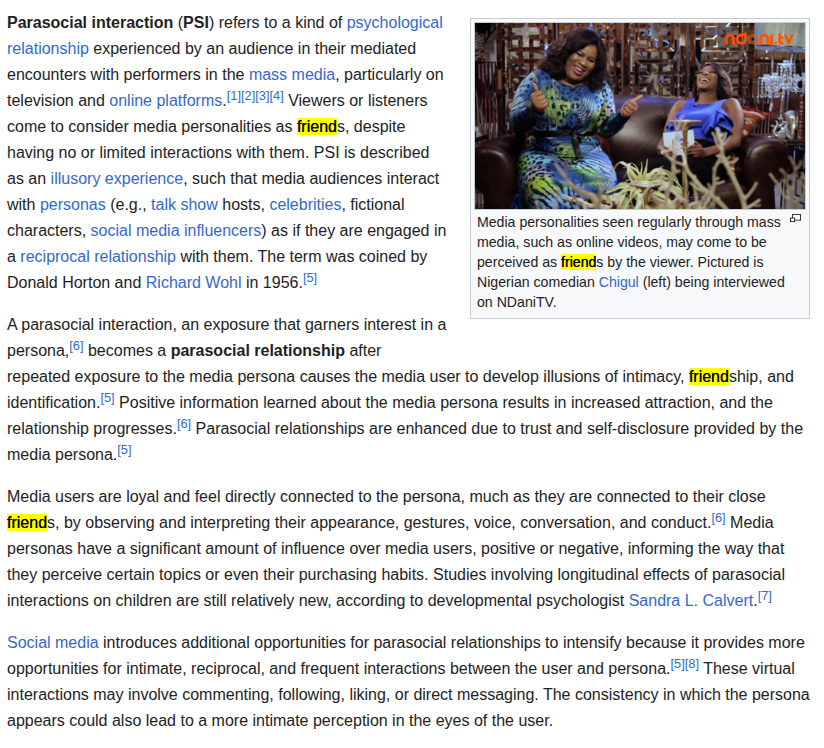

In [51]:
# Follow-up question:
url_page = "https://www.ibtimes.com/bts-jungkook-unintentionally-sells-out-product-during-livestream-7-other-k-pop-idols-dubbed-3697297"
question = "Using the parasocial interaction theory, explain the case presented in the provided link."
payload = {
    "model": model,
    "prompt": f"{question}\n\nContext URL: {url_page}",
    "stream": False
}

# Make the request to Ollama
try:
    response = requests.post(ollama_url, json=payload)
    response.raise_for_status()
    
    # Parse the response
    result = response.json()
    answer = result.get("response", "No response received")
    
    print("OLLAMA MISTRAL - PARASOCIAL INTERACTION ANALYSIS")
    print(f"\nQuestion:\n{question}\n")
    print(f"URL: {url_page}\n")

    print("ANSWER:")
    print(answer)
    
except requests.exceptions.ConnectionError:
    print("Error: Could not connect to Ollama. Make sure Ollama is running at http://localhost:11434")
except Exception as e:
    print(f"Error: {e}")

OLLAMA MISTRAL - PARASOCIAL INTERACTION ANALYSIS

Question:
Using the parasocial interaction theory, explain the case presented in the provided link.

URL: https://www.ibtimes.com/bts-jungkook-unintentionally-sells-out-product-during-livestream-7-other-k-pop-idols-dubbed-3697297

ANSWER:
 The parasocial interaction theory, as described by Donald Horton and Rolf Wohlwend in 1956, refers to a one-sided communication situation in which the audience of a medium (such as television or social media) experiences a sense of a personal, direct relationship with the performer. In this context, let's analyze the case presented in the provided link regarding BTS' Jungkook and other K-pop idols.

In the given article, it mentions that Jungkook unintentionally sold out a product during a livestream, causing fans to panic buy due to their perceived personal relationship with him based on the parasocial interaction theory. When fans feel connected to their favorite celebrities, they may be more inclin

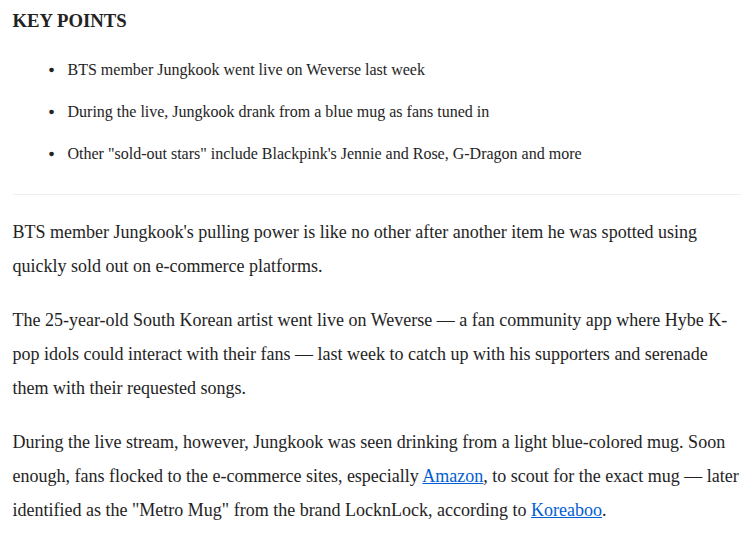

The model's predictions are correct and overall well-explained. Indeed most of the relevant elements have been correctly identified and described. The answers are satisfactory, as we would expect from a proper RAG model, which fact-checks its production thanks to the attached ressource.

No important information was missing and the answer is concise enough for the kind of query that was sent out, as well as intellibible.

---
### <a id='toc1_5_10_'></a>[**2.6 Few-Shot Prompting Classification:**](#toc0_)

Few-shot prompting is a technique where a Large Language Model (LLM) is given a small number of labeled examples within a prompt to guide its classification. This allows the model to perform a new task with minimal data, avoiding the need for extensive fine-tuning.

In this lab, we will use the Gemini API to perform zero-shot, 1-shot, and 5-shot emotion classification:

*   **Zero-shot:** The model classifies text without any prior examples.
*   **1-shot:** The model is given one example for each emotion before classifying.
*   **5-shot:** The model is given five examples per emotion for better context.

To make our implementation robust and efficient, we are incorporating two key features:

1.  **Structured Output:** We provide the Gemini model with a specific output schema (`Emotions` class). This instructs the model to return *only* a valid emotion label (e.g., `joy`), which makes the output predictable and reliable, minimizing errors.
2.  **API Rate Handling:** The code includes a function to manage the requests-per-minute limit of the Gemini API.

We will test the model's performance on a small sample of 20 texts per emotion to ensure the process runs quickly. If the model provides an invalid response, the code will automatically retry the request until a valid classification is received.

**Prompt Structure:**
`System Instruction -> Task Description -> Examples (if not zero-shot) -> Text to Classify`


<span style="color:green">For the exercises in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

In [52]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import enum
import os
from tqdm import tqdm
import json
import time
# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting

# Schema for the output, the type enum can be used to make a pool of options if what we want is to classify our text selecting only one of them
class Emotions(enum.StrEnum):
    ANGER = 'anger'
    FEAR = 'fear'
    JOY = 'joy'
    SADNESS = 'sadness'


# Function to handle the rate limits of gemini models
def handle_rate_limit(request_count, first_request_time, max_calls_per_min):
    current_time = time.time()

    # Initialize timer on the first request of a new window
    if request_count == 0:
        first_request_time = current_time

    request_count += 1

    # If the rate limit is reached
    if request_count > max_calls_per_min:
        elapsed_time = current_time - first_request_time
        if elapsed_time < 60:
            wait_time = 60 - elapsed_time
            print(f"Rate limit of {max_calls_per_min} requests per minute reached. Waiting for {wait_time:.2f} seconds.")
            time.sleep(wait_time)

        # Reset for the new window
        request_count = 1
        first_request_time = time.time()
    
    return request_count, first_request_time, max_calls_per_min

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    """
    
    prompt = classification_instructions + "\n\n"
    
    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nClass: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base, system_prompt, classes, schema):
    response = None
    while not response or response not in classes:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nClass: " #The classification text will leave the emotion label to be filled in by the LLM
        try:
            result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt)
            # print(f"result: {result} \n")
            # print(f"type: {type(result)}")
            if not result:
                # In case of giving empty responses with temperature 0.0, we set a higher temperature to seek for different responses
                result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt, temperature=1.0)

            try:
                # If the result is in the correct format it can be parsed using json
                response = json.load(result)
            except:
                # In case it's not in a json friendly format
                # Deleting characters " and ' in case they appear in our response with the class of the text 
                response = result.replace('"', '')    
                response = response.replace("'", "")  

                
        # except exceptions.ResourceExhausted as e:
        except Exception as e:
            print(f"Waiting to retry... Error: {e}")
            time.sleep(15)
            print(f"test_text: {test_text}")
            return classify_with_llm(test_text, prompt_base, system_prompt, classes, schema) # Retry the request


        if response not in classes:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, num_test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots) 
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # System prompt for our classification model:
    system_prompt = "You are an emotion classification model for text data. Do not give empty responses, classify according to the list of possible classes."

    # Prepare to classify the test set
    results_data = []

    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=num_test_samples)

    # Variables to handle rate limit of gemini
    request_count = 0
    max_calls_per_min = 15 # Gemini 2.5 Flash Lite has this maximum set in the documentation
    first_request_time = None

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in tqdm(test_samples[emotion].iterrows(), desc=f"Processing samples for emotion: {emotion}...", total=num_test_samples):
            test_text = test_row['text']
            request_count, first_request_time, max_calls_per_min = handle_rate_limit(request_count, first_request_time, max_calls_per_min)  # Check and handle rate limit before each API call
            predicted_emotion = classify_with_llm(test_text = test_text, prompt_base = prompt_base, system_prompt = system_prompt, classes = emotions, schema = Emotions)
            # Append the results data:
            results_data.append({
                    'text': test_text,
                    'true_emotion': emotion,
                    'predicted_emotion': predicted_emotion
                })

    # Create dataframe to save the results data
    results_df = pd.DataFrame(results_data)
    
    # Extract just the true and predicted labels for metrics calculations
    true_labels = results_df['true_emotion']
    predictions = results_df['predicted_emotion']

    output_dir = "./results/llm_classification_results"
    os.makedirs(output_dir, exist_ok=True)
    # Save the results
    filename = f"{output_dir}/results_samples_{num_test_samples}_shots_{num_shots}.csv"
    
    # Save the DataFrame to CSV
    results_df.to_csv(filename, index=False)
    print(f"\nResults saved to {filename}")

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions) 
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')

**Important: The next part should take around 16 minutes to finish running due to API Rate Limits**

**Note:** You might see an `429 RESOURCE_EXHAUSTED` error when running the following code all at once, this is because the `current API Rate Limit handling cannot reliably find out how many requests we have left per minute` from cell to cell, there is no Gemini feature created for it to get the information from their servers. So, `if you don't want to see the error you can just wait 1 minute` after one cell finished processing. But `even if there is an error showing it is fine`, internally in the code `there is a retry that happens every 15 seconds` until we finish processing our sampled data. `The lab is designed to never reach the total rate limit per day quota.`


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    




Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:13<00:04,  1.06it/s]

Rate limit of 15 requests per minute reached. Waiting for 46.27 seconds.
Error occurred when generating response, error: 503 UNAVAILABLE. {'error': {'code': 503, 'message': 'The model is overloaded. Please try again later.', 'status': 'UNAVAILABLE'}}


Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:08<00:09,  1.07it/s]

Rate limit of 15 requests per minute reached. Waiting for 46.05 seconds.


Processing samples for emotion: fear...:  55%|█████▌    | 11/20 [00:55<02:15, 15.02s/it]

Error occurred when generating response, error: 503 UNAVAILABLE. {'error': {'code': 503, 'message': 'The model is overloaded. Please try again later.', 'status': 'UNAVAILABLE'}}


Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:03<00:10,  1.46it/s]

Rate limit of 15 requests per minute reached. Waiting for 47.34 seconds.


Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 45.95 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [01:00<00:05,  1.09s/it]

Rate limit of 15 requests per minute reached. Waiting for 45.22 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:50<00:00,  5.51s/it]



Results saved to ./results/llm_classification_results/results_samples_20_shots_0.csv
Accuracy: 52.50%
              precision    recall  f1-score   support

       anger       0.48      0.60      0.53        20
        fear       0.83      0.25      0.38        20
         joy       0.46      0.85      0.60        20
     sadness       0.67      0.40      0.50        20

    accuracy                           0.53        80
   macro avg       0.61      0.53      0.50        80
weighted avg       0.61      0.53      0.50        80



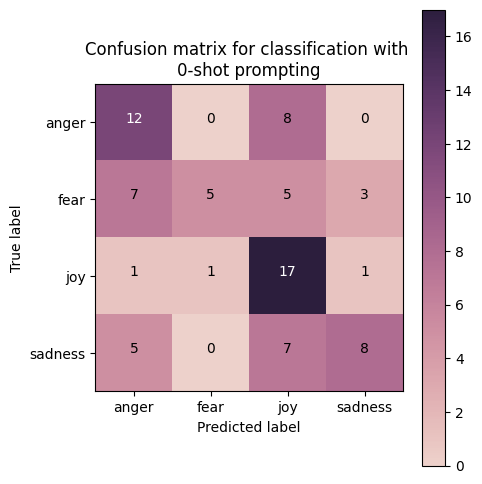

In [54]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with zero-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=0)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: Controlling #anger is a sign of those #righteous people promised #Paradise in the #Quran in Surah Al Imran verses 133-134 #reward #goodDeed
Class: anger

Text: Girls with hairy arms scare me
Class: fear

Text: Ooh #hygge, candles, jasmine tea &amp; #GBBO #happy
Class: joy

Text: 2 applications for my dbs and still waiting. Been over a year now. Going to loose my job 👍🏿 @GOVUK  #thanks #unhappy #crb
Class: sadness




Processing samples for emotion: anger...:  55%|█████▌    | 11/20 [00:08<00:06,  1.38it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 897.963946ms.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': 

Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:56<00:27,  5.48s/it]

Rate limit of 15 requests per minute reached. Waiting for 3.19 seconds.


Processing samples for emotion: fear...:  35%|███▌      | 7/20 [00:06<00:12,  1.07it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 58.370005223s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:38<00:53,  5.34s/it]

Rate limit of 15 requests per minute reached. Waiting for 17.10 seconds.


Processing samples for emotion: fear...:  60%|██████    | 12/20 [00:57<00:53,  6.66s/it]

Error occurred when generating response, error: 503 UNAVAILABLE. {'error': {'code': 503, 'message': 'The model is overloaded. Please try again later.', 'status': 'UNAVAILABLE'}}


Processing samples for emotion: joy...:  10%|█         | 2/20 [00:01<00:15,  1.15it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 58.122391677s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:34<01:32,  6.16s/it]

Rate limit of 15 requests per minute reached. Waiting for 16.20 seconds.


Processing samples for emotion: joy...:  90%|█████████ | 18/20 [01:02<00:01,  1.02it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 57.59031436s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': 

Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 16.41 seconds.


Processing samples for emotion: sadness...:  70%|███████   | 14/20 [00:28<00:05,  1.15it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 57.147895822s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [00:59<00:49,  9.95s/it]

Rate limit of 15 requests per minute reached. Waiting for 17.08 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:20<00:00,  4.02s/it]


Results saved to ./results/llm_classification_results/results_samples_20_shots_1.csv
Accuracy: 55.00%
              precision    recall  f1-score   support

       anger       0.52      0.70      0.60        20
        fear       0.75      0.30      0.43        20
         joy       0.47      0.75      0.58        20
     sadness       0.69      0.45      0.55        20

    accuracy                           0.55        80
   macro avg       0.61      0.55      0.54        80
weighted avg       0.61      0.55      0.54        80



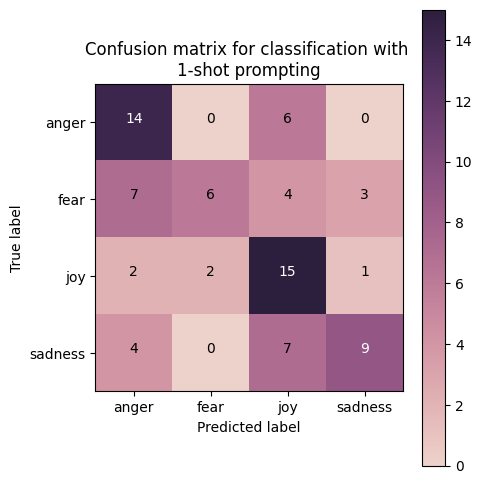

In [55]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 1-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=1)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: Controlling #anger is a sign of those #righteous people promised #Paradise in the #Quran in Surah Al Imran verses 133-134 #reward #goodDeed
Class: anger

Text: Lot 100 would give Ghandi road rage
Class: anger

Text: @OstinOng YUUUHH 🙄😭 plus clin ep and prevmed ugghhh hahaha 
Class: anger

Text: If i could just get my line to block! #germantownbroncos #lilleague #popwarner #Broncos #usafootball  #lineman
Class: anger

Text: Michelle is one of the worst players in bb history #bb18 #bbfinale #bitter
Class: anger

Text: Girls with hairy arms scare me
Class: fear

Text: He replied to my comments 4 times now i'm shaking omg
Class: fear

Text: .@REDBLACKS’ Chris Williams: 5 yards shy of joining 1,000-yard club. Bowman (1,279), Walker (1,168) &amp; Roosevelt (1,095) already there. #CFL
Class: fear


Processing samples for emotion: anger...:  35%|███▌      | 7/20 [00:05<00:10,  1.22it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource has been exhausted (e.g. check quota).', 'status': 'RESOURCE_EXHAUSTED'}}
Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource has been exhausted (e.g. check quota).', 'status': 'RESOURCE_EXHAUSTED'}}
Waiting to retry... Error: 'NoneType' object has no attribute 'replace'
test_text: @isthataspider @dhodgs i will fight this guy! Don't insult the lions like that! But seriously they kinda are.Wasted some of the best players


Processing samples for emotion: anger...:  40%|████      | 8/20 [00:21<01:07,  5.61s/it]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 43.179300488s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:42<00:08,  1.76s/it]

Rate limit of 15 requests per minute reached. Waiting for 17.26 seconds.


Processing samples for emotion: fear...:  20%|██        | 4/20 [00:03<00:13,  1.16it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 56.906015156s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:38<00:24,  2.42s/it]

Rate limit of 15 requests per minute reached. Waiting for 16.77 seconds.


Processing samples for emotion: joy...:   0%|          | 0/20 [00:00<?, ?it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 56.038927315s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:34<00:53,  3.53s/it]

Rate limit of 15 requests per minute reached. Waiting for 16.27 seconds.


Processing samples for emotion: joy...:  80%|████████  | 16/20 [01:01<00:04,  1.10s/it]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 54.760846372s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 16.06 seconds.


Processing samples for emotion: sadness...:  60%|██████    | 12/20 [00:26<00:08,  1.02s/it]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 54.066191735s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [01:00<00:27,  5.46s/it]

Rate limit of 15 requests per minute reached. Waiting for 15.92 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:20<00:00,  4.03s/it]


Results saved to ./results/llm_classification_results/results_samples_20_shots_5.csv
Accuracy: 61.25%
              precision    recall  f1-score   support

       anger       0.64      0.70      0.67        20
        fear       0.75      0.30      0.43        20
         joy       0.53      0.80      0.64        20
     sadness       0.65      0.65      0.65        20

    accuracy                           0.61        80
   macro avg       0.64      0.61      0.60        80
weighted avg       0.64      0.61      0.60        80



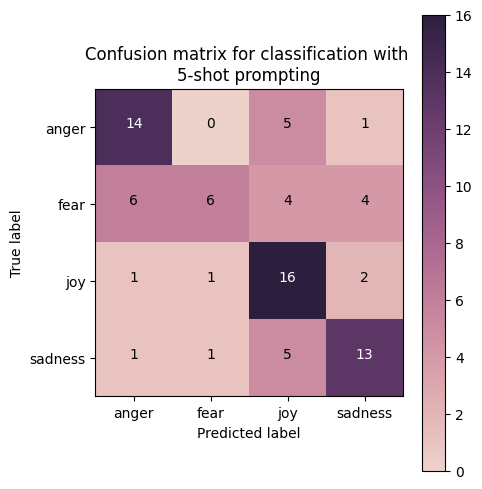

In [56]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 5-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=5)

---
##### <a id='toc1_5_10_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Compare and discuss the overall results of the zero-shot, 1-shot and 5-shot classification.

For the ease of comparison, let us show the graphs obtained above, altogether.

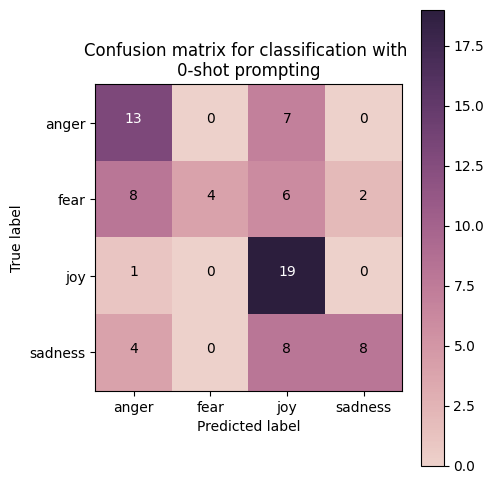
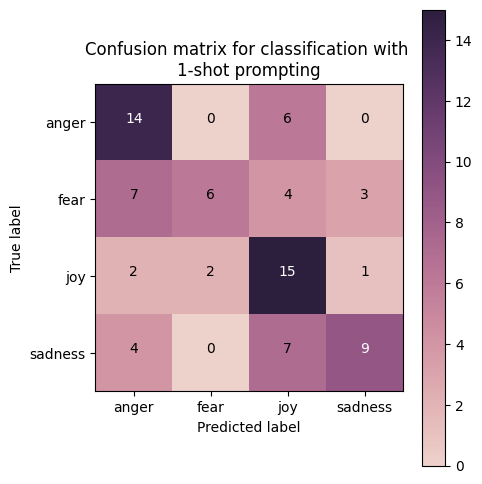
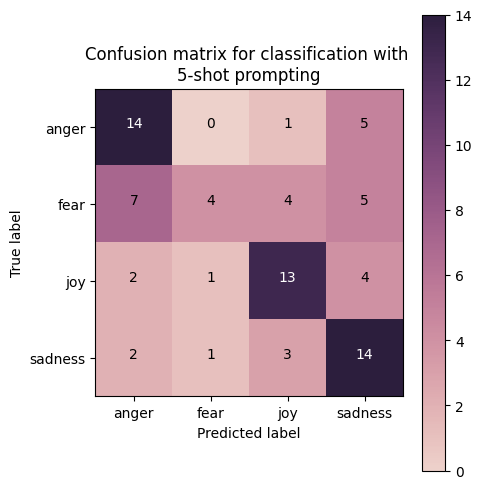

We would expect that providing more examples to the model would render its performances more accurate, and help reduce misclassification, but it is not so easy.

In a confusion matrix, the more the frequences are concentrated around the diagonal, the better the results, as it means that classification occurred correctly.
In our application, it would seem that the only emotion that is much better classified in 5-shot when compared to 0-shot is the "sadness" category, performances are comparable when it comes to "anger" and "fear", but surprisingly, there is a reduction in the accuracy of the prediction for "joy". 
The results of 1-shot are in-between but more similar to 0-shot.

When looking back at our UMAP representations, this is likely because of the proximity of some of the data points with clusters from other emotion labels. Indeed there is ambiguity, as we already explored in phase 1 of the lab 2.
Other explainations are also possible, for example a context overload or recency bias, where the examples become more important than the previously learnt information. This can be a problem if there is a mismach in the quality or in the distributions of the examples when compared to the training and the test set.

Few-shot prompting works best when the examples are not ambiguous and well selected instead of being selected randomly, and when the task clear and well defined.

---
##### <a id='toc1_5_10_1_2_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

**Case Study:** Check the results' files inside the `results/llm_classification_results` directory and find cases where the **text classification improves with more examples** (pred emotion is right with examples), **cases where it does not improve** (pred emotion always wrong) and **cases where the classification got worse with more examples** (pred emotion goes from right to wrong with examples). For this you need to load the results with pandas and handle the data using its dataframe functions. Discuss about the findings.

In [57]:
# Define function to plot confusion matrices for all three prompting strategies
def plot_confusion_matrices(results_0shot, results_1shot, results_5shot):
    """
    Plot confusion matrices for 0-shot, 1-shot, and 5-shot prompting strategies side by side.
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    datasets = [
        (results_0shot, "0-Shot Prompting", axes[0]),
        (results_1shot, "1-Shot Prompting", axes[1]),
        (results_5shot, "5-Shot Prompting", axes[2])
    ]
    
    for results, title, ax in datasets:
        # Compute confusion matrix
        cm = confusion_matrix(results['true_emotion'], results['predicted_emotion'], labels=emotions)
        
        # Plot heatmap
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions, ax=ax, cbar=True)
        ax.set_title(title, fontsize=14, fontweight='bold')
        ax.set_ylabel('True Emotion')
        ax.set_xlabel('Predicted Emotion')
        
        # Calculate and display accuracy
        accuracy = accuracy_score(results['true_emotion'], results['predicted_emotion'])
        ax.text(0.5, -0.15, f'Accuracy: {accuracy:.2%}', transform=ax.transAxes, ha='center', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

   Total matching comments: 86
   Columns: ['text', 'true_emotion_0shot', 'predicted_emotion_0shot', 'true_emotion_1shot', 'predicted_emotion_1shot', 'true_emotion_5shot', 'predicted_emotion_5shot']

   Sample of comparison table:
                                                text true_emotion_0shot  \
0  S/O to the girl that just hit my car...not onl...              anger   
1  Sometimes I get mad over something so minuscul...              anger   
2  @FluDino Event started! everyone is getting re...              anger   
3  Sometimes I get mad over something so minuscul...              anger   
4  @huwellwell One chosen by the CLP members! MP ...              anger   
5  Just watched Django Unchained, Other people ma...              anger   
6  Just watched Django Unchained, Other people ma...              anger   
7  Just watched Django Unchained, Other people ma...              anger   
8  Just watched Django Unchained, Other people ma...              anger   
9   @LeonWobYP b***

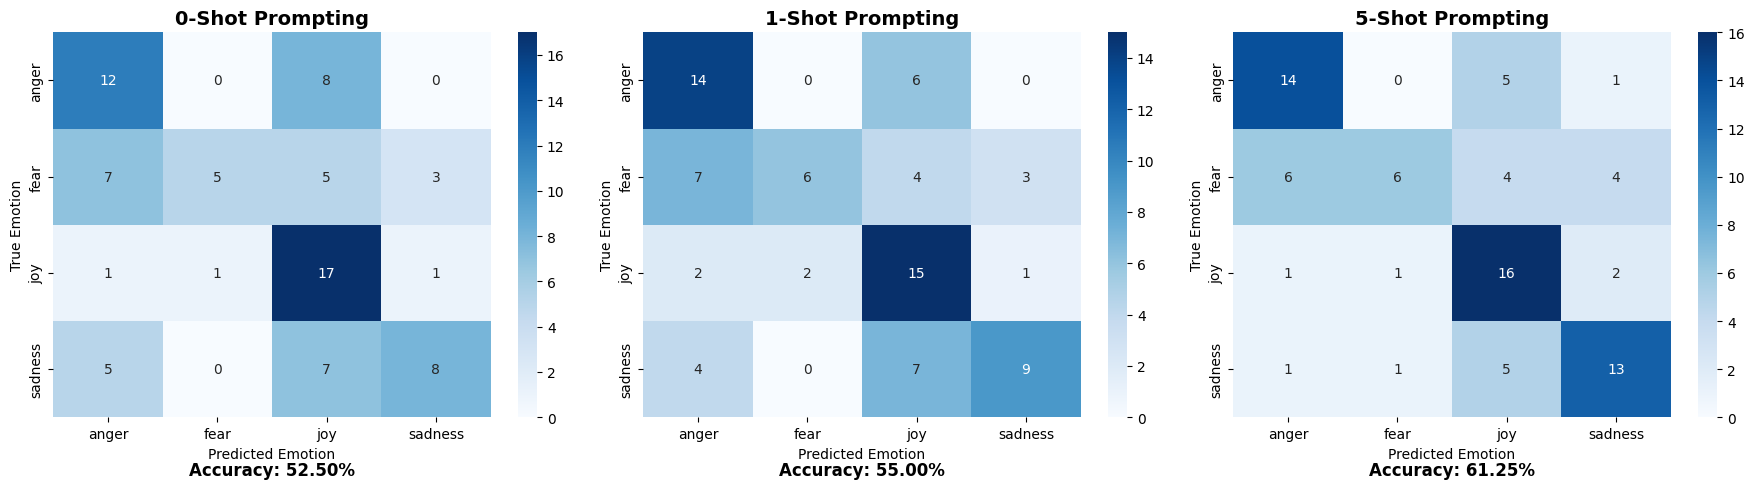

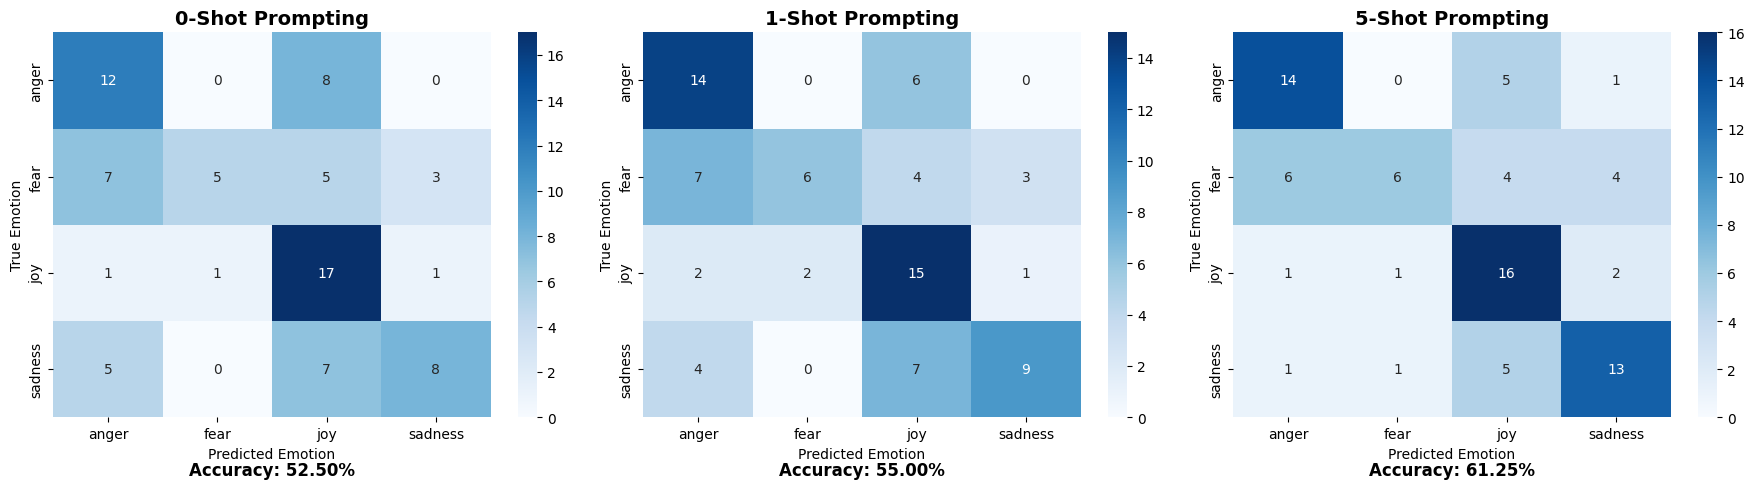

MISCLASSIFIED EXAMPLES - 0-SHOT PROMPTING

ANGER (True Emotion) - Misclassified as:
----------------------------------------------------------------------------------------------------

  Example 1:
    True Emotion:      anger
    Predicted Emotion: joy
    Text: "@FluDino Event started! everyone is getting ready to travel to the lake of rage, where eve..."

  Example 2:
    True Emotion:      anger
    Predicted Emotion: joy
    Text: "Just watched Django Unchained, Other people may frown, but I titter in delight! 2/5"

FEAR (True Emotion) - Misclassified as:
----------------------------------------------------------------------------------------------------

  Example 1:
    True Emotion:      fear
    Predicted Emotion: sadness
    Text: "@lukeshawtime terrible"

  Example 2:
    True Emotion:      fear
    Predicted Emotion: sadness
    Text: "@CesarSampao @thisisbolton don't get me started on town centre. Used to go every week.... ..."

JOY (True Emotion) - Misclassified as:
----

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import os

# Define emotions list if not already defined
emotions = ['anger', 'fear', 'joy', 'sadness']

results_dir = "results/llm_classification_results/"
# Load each CSV file into a dataframe
results_0shot = pd.read_csv(os.path.join(results_dir, "results_samples_20_shots_0.csv"))
results_1shot = pd.read_csv(os.path.join(results_dir, "results_samples_20_shots_1.csv"))
results_5shot = pd.read_csv(os.path.join(results_dir, "results_samples_20_shots_5.csv"))

# Strip whitespace from text column in all dataframes to ensure proper matching
results_0shot['text'] = results_0shot['text'].str.strip()
results_1shot['text'] = results_1shot['text'].str.strip()
results_5shot['text'] = results_5shot['text'].str.strip()

# Select and rename columns for each dataset
df_0shot = results_0shot[['text', 'true_emotion', 'predicted_emotion']].copy()
df_0shot.columns = ['text', 'true_emotion_0shot', 'predicted_emotion_0shot']

df_1shot = results_1shot[['text', 'true_emotion', 'predicted_emotion']].copy()
df_1shot.columns = ['text', 'true_emotion_1shot', 'predicted_emotion_1shot']

df_5shot = results_5shot[['text', 'true_emotion', 'predicted_emotion']].copy()
df_5shot.columns = ['text', 'true_emotion_5shot', 'predicted_emotion_5shot']

# Join the tables on the text column
comparison_table = df_0shot.merge(df_1shot, on='text', how='inner')
comparison_table = comparison_table.merge(df_5shot, on='text', how='inner')

print(f"   Total matching comments: {len(comparison_table)}")
print(f"   Columns: {list(comparison_table.columns)}")
print(f"\n   Sample of comparison table:")
print(comparison_table.head(10))

# Verify all true_emotion values are the same (sanity check)
true_emotions_match = (comparison_table['true_emotion_0shot'] == comparison_table['true_emotion_1shot']).all() and \
                       (comparison_table['true_emotion_1shot'] == comparison_table['true_emotion_5shot']).all()

if true_emotions_match:
    print(f"\n✅ True emotions are consistent across all models (as expected)")

else:
    print(f"\n⚠️ Warning: True emotions differ across models - this shouldn't happen!")

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    datasets = [
        (results_0shot, "0-Shot Prompting", axes[0]),
        (results_1shot, "1-Shot Prompting", axes[1]),
        (results_5shot, "5-Shot Prompting", axes[2])
    ]
    
    for results, title, ax in datasets:
        # Compute confusion matrix
        cm = confusion_matrix(results['true_emotion'], results['predicted_emotion'], labels=emotions)
        
        # Plot heatmap
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions, ax=ax, cbar=True)
        ax.set_title(title, fontsize=14, fontweight='bold')
        ax.set_ylabel('True Emotion')
        ax.set_xlabel('Predicted Emotion')
        
        # Calculate and display accuracy
        accuracy = accuracy_score(results['true_emotion'], results['predicted_emotion'])
        ax.text(0.5, -0.15, f'Accuracy: {accuracy:.2%}', transform=ax.transAxes, ha='center', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# Plot all three confusion matrices
plot_confusion_matrices(results_0shot, results_1shot, results_5shot)

# Function to extract misclassified examples
def get_misclassified_examples(results, num_examples=3):
    misclassified = results[results['true_emotion'] != results['predicted_emotion']]
    
    examples_by_emotion = {}
    for emotion in emotions:
        emotion_misclassified = misclassified[misclassified['true_emotion'] == emotion]
        examples = emotion_misclassified.head(num_examples)
        examples_by_emotion[emotion] = examples
    
    return examples_by_emotion

# Display misclassified examples for each dataset
datasets_info = [
    (results_0shot, "0-SHOT PROMPTING"),
    (results_1shot, "1-SHOT PROMPTING"),
    (results_5shot, "5-SHOT PROMPTING")
]

for results, dataset_name in datasets_info:
    print(f"MISCLASSIFIED EXAMPLES - {dataset_name}")
    
    misclassified_examples = get_misclassified_examples(results, num_examples=2)
    
    for emotion in emotions:
        examples = misclassified_examples[emotion]
        
        if len(examples) > 0:
            print(f"\n{emotion.upper()} (True Emotion) - Misclassified as:")
            print("-" * 100)
            
            for idx, (_, row) in enumerate(examples.iterrows(), 1):
                print(f"\n  Example {idx}:")
                print(f"    True Emotion:      {row['true_emotion']}")
                print(f"    Predicted Emotion: {row['predicted_emotion']}")
                print(f"    Text: \"{row['text'][:90]}{'...' if len(row['text']) > 90 else ''}\"")
        else:
            print(f"\n{emotion.upper()}: No misclassified examples")
    
    print("\n" + "="*100)

In [65]:
# Analyze consistent vs inconsistent misclassifications across models

# Merge the three results dataframes on text to compare predictions
# Use merge to ensure all texts match correctly
merged_results = results_0shot[['text', 'true_emotion', 'predicted_emotion']].copy()
merged_results.columns = ['text', 'true_emotion', 'pred_0shot']

# Merge with 1-shot and 5-shot results on the text column
merged_results = merged_results.merge(
    results_1shot[['text', 'predicted_emotion']].rename(columns={'predicted_emotion': 'pred_1shot'}),
    on='text',
    how='left'
)

merged_results = merged_results.merge(
    results_5shot[['text', 'predicted_emotion']].rename(columns={'predicted_emotion': 'pred_5shot'}),
    on='text',
    how='left'
)

# Check for NaN values in merged results
nan_count_1shot = merged_results['pred_1shot'].isna().sum()
nan_count_5shot = merged_results['pred_5shot'].isna().sum()

if nan_count_1shot > 0 or nan_count_5shot > 0:
    print(f"Warning: Found {nan_count_1shot} NaN values in 1-shot predictions and {nan_count_5shot} NaN values in 5-shot predictions")
    print("This may indicate text mismatches between CSV files.")

# Identify misclassifications
merged_results['misclass_0shot'] = merged_results['true_emotion'] != merged_results['pred_0shot']
merged_results['misclass_1shot'] = merged_results['true_emotion'] != merged_results['pred_1shot']
merged_results['misclass_5shot'] = merged_results['true_emotion'] != merged_results['pred_5shot']

# Count total misclassifications across models (treating NaN as a prediction error)
merged_results['total_misclass_count'] = merged_results['misclass_0shot'].astype(int) + merged_results['misclass_1shot'].astype(int) + merged_results['misclass_5shot'].astype(int)

# Categorize examples
consistently_misclassified = merged_results[(merged_results['total_misclass_count'] == 3) & 
                                            ((merged_results['pred_0shot'] == merged_results['pred_1shot']) & 
                                             (merged_results['pred_1shot'] == merged_results['pred_5shot']))]

inconsistently_misclassified = merged_results[(merged_results['total_misclass_count'] > 0) & 
                                              (merged_results['total_misclass_count'] < 3)]

always_correct = merged_results[merged_results['total_misclass_count'] == 0]
sometimes_correct = merged_results[(merged_results['total_misclass_count'] > 0) & 
                                   (merged_results['total_misclass_count'] < 3)]

print("ANALYSIS: CONSISTENCY OF MISCLASSIFICATIONS ACROSS MODELS (0-shot, 1-shot, 5-shot)")

print(f"\nSUMMARY STATISTICS:")
print(f"   Total examples: {len(merged_results)}")
print(f"   Always correctly classified: {len(always_correct)} ({len(always_correct)/len(merged_results)*100:.1f}%)")
print(f"   Always misclassified (same error): {len(consistently_misclassified)} ({len(consistently_misclassified)/len(merged_results)*100:.1f}%)")
print(f"   Inconsistently misclassified (different errors): {len(inconsistently_misclassified)} ({len(inconsistently_misclassified)/len(merged_results)*100:.1f}%)")

# Show consistently misclassified examples
if len(consistently_misclassified) > 0:
    print("CONSISTENTLY MISCLASSIFIED (Same error across all 3 models):")

    for emotion in emotions:
        emotion_examples = consistently_misclassified[consistently_misclassified['true_emotion'] == emotion]
        
        if len(emotion_examples) > 0:
            print(f"\n{emotion.upper()} - Misclassified to: {emotion_examples.iloc[0]['pred_0shot']}")
            
            for idx, (_, row) in enumerate(emotion_examples.head(3).iterrows(), 1):
                print(f"\n  Example {idx}:")
                print(f"    True: {row['true_emotion']} → All models predicted: {row['pred_0shot']}")
                print(f"    Text: \"{row['text'][:100]}{'...' if len(row['text']) > 100 else ''}\"")

# Show inconsistently misclassified examples
if len(inconsistently_misclassified) > 0:
    print("INCONSISTENTLY MISCLASSIFIED (Different predictions across models):")
    
    for emotion in emotions:
        emotion_examples = inconsistently_misclassified[inconsistently_misclassified['true_emotion'] == emotion]
        
        if len(emotion_examples) > 0:
            print(f"\n{emotion.upper()}:")
            
            for idx, (_, row) in enumerate(emotion_examples.head(3).iterrows(), 1):
                print(f"\n  Example {idx}:")
                print(f"    0-shot → {row['pred_0shot']} | 1-shot → {row['pred_1shot']} | 5-shot → {row['pred_5shot']}")
                print(f"    Text: \"{row['text'][:100]}{'...' if len(row['text']) > 100 else ''}\"")


ANALYSIS: CONSISTENCY OF MISCLASSIFICATIONS ACROSS MODELS (0-shot, 1-shot, 5-shot)

SUMMARY STATISTICS:
   Total examples: 86
   Always correctly classified: 40 (46.5%)
   Always misclassified (same error): 30 (34.9%)
   Inconsistently misclassified (different errors): 10 (11.6%)
CONSISTENTLY MISCLASSIFIED (Same error across all 3 models):

ANGER - Misclassified to: joy

  Example 1:
    True: anger → All models predicted: joy
    Text: "@FluDino Event started! everyone is getting ready to travel to the lake of rage, where everything gl..."

  Example 2:
    True: anger → All models predicted: joy
    Text: "Just watched Django Unchained, Other people may frown, but I titter in delight! 2/5"

  Example 3:
    True: anger → All models predicted: joy
    Text: "Just watched Django Unchained, Other people may frown, but I titter in delight! 2/5"

FEAR - Misclassified to: sadness

  Example 1:
    True: fear → All models predicted: sadness
    Text: "@CesarSampao @thisisbolton don't get me

Examples that are consistently misclassified suggest that the text is genuinely ambiguous or has features conflicting with its true label, and that the model architecture/embeddings struggle with the specific language patterns being employed. Another possibility is that the text may be mislabeled in the ground truth.

From the examples that have been identified, let's take the example of "It really is amazing the money they give to some of these QB's #nfl #texans #brock #terrible" 
The correct label is fear, while the predicted label is anger for all models. As a humam being myself, it is difficult without the context to understand what this means and this could sound like a polemic statement or advocacy for a specific social fight, thus indeed classified as anger rather than fear.

Examples that are inconsistently misclassified (different errors across models) suggest that few-shot prompting changes the model's reasoning and can help or hurt its discriminative power. Additionally, model sensitivity to example selection varies and the prompt context influences interpretation differently for these cases.

If we look at the confusion matrices, we can see that there is an improvement, with an increase of the total number of elements on the diagonal (for the same sample size), but this increase is marginal, it only increases from 42 correctly classified elements in 0-shot to 49 in 5-shot. The confusion accross categories is similar to what was observed in exercise 6, namely the notable increase in the correct classification of "sadness", but the model struggle to improve performance other categories. 
Once again, 1-shot is an in-between of 0-shot and 5-shot, but here it only has 43 total (correct) elements on the diagonal, once again being very close to the performance of 0-shot.


In [61]:
# Verify that text labels are identical across all three CSV files

print("VERIFYING TEXT CONSISTENCY ACROSS CSV FILES\n")

# Get the text values from each CSV file
text_0shot = set(results_0shot['text'].str.strip())
text_1shot = set(results_1shot['text'].str.strip())
text_5shot = set(results_5shot['text'].str.strip())

print(f"Total unique texts in 0-shot: {len(text_0shot)}")
print(f"Total unique texts in 1-shot: {len(text_1shot)}")
print(f"Total unique texts in 5-shot: {len(text_5shot)}")

# Check intersections
common_0shot_1shot = text_0shot & text_1shot
common_0shot_5shot = text_0shot & text_5shot
common_1shot_5shot = text_1shot & text_5shot
common_all_three = text_0shot & text_1shot & text_5shot

print(f"\nCommon texts between 0-shot and 1-shot: {len(common_0shot_1shot)}")
print(f"Common texts between 0-shot and 5-shot: {len(common_0shot_5shot)}")
print(f"Common texts between 1-shot and 5-shot: {len(common_1shot_5shot)}")
print(f"Common texts across ALL THREE: {len(common_all_three)}")

# Check if all texts are identical
if text_0shot == text_1shot == text_5shot:
    print(f"\nSUCCESS: All three CSV files contain IDENTICAL text labels!")
else:
    print(f"\nMISMATCH: The CSV files do NOT contain identical text labels")
    
    # Show which texts are missing from each file
    missing_in_1shot = text_0shot - text_1shot
    missing_in_5shot = text_0shot - text_5shot
    missing_in_0shot = text_1shot - text_0shot
    
    if missing_in_1shot:
        print(f"\nTexts in 0-shot but NOT in 1-shot ({len(missing_in_1shot)}):")
        for text in list(missing_in_1shot)[:5]:
            print(f"  - \"{text[:80]}...\"")
    
    if missing_in_5shot:
        print(f"\nTexts in 0-shot but NOT in 5-shot ({len(missing_in_5shot)}):")
        for text in list(missing_in_5shot)[:5]:
            print(f"  - \"{text[:80]}...\"")
    
    if missing_in_0shot:
        print(f"\nTexts in 1-shot but NOT in 0-shot ({len(missing_in_0shot)}):")
        for text in list(missing_in_0shot)[:5]:
            print(f"  - \"{text[:80]}...\"")


VERIFYING TEXT CONSISTENCY ACROSS CSV FILES

Total unique texts in 0-shot: 79
Total unique texts in 1-shot: 79
Total unique texts in 5-shot: 79

Common texts between 0-shot and 1-shot: 79
Common texts between 0-shot and 5-shot: 79
Common texts between 1-shot and 5-shot: 79
Common texts across ALL THREE: 79

SUCCESS: All three CSV files contain IDENTICAL text labels!


After analysing the results more closely, not all of the test examples are the same accross all models, in the CSV files. This is arguably not a good idea for benchmarking the models efficiently, as they may be compared unjustly on different grounds.

The previous comments hold, but it is difficult to make more precise analysis of when the predictions differ accross mdoels since these predictions were not made on the same texts. We will have to limit ourselves to these conclusions.

---
### <a id='toc1_5_11_'></a>[**2.7 Extra LLM Related Materials:**](#toc0_)
So this will be it for the lab, but here are some extra materials if you would like to explore:

- **How to use OpenAI ChatGPT model's API (Not Free API):** [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

- **How to Fine-tune and run local LLMs with the `unsloth` library:** [unsloth tutorials](https://docs.unsloth.ai/models/tutorials-how-to-fine-tune-and-run-llms)

- **Google's Agent Development Kit Documentation:** [ADK](https://google.github.io/adk-docs/)

- **Build AI agents with LangGraph:** [LangGraph Documentation](https://langchain-ai.github.io/langgraph/concepts/why-langgraph/)

---

### Acknowledgements

This work has been realised with the help of Github's Copilot for code completion and debugging, Mistral's Le Chat for semantic understanding and Ollama's open source models when my credits expired, in particular gemma3, mistral and deepseek.
These last models were only used for continuing the project without having to wait for the rate-limitation to lift.